                                       Предобработка данных

Импортируем необходимые библиотеки для выполнения предобработки данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle


In [2]:
btc = pd.read_csv('C:/projects/btcusdt_1m.csv')

In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017611 entries, 0 to 1017610
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   timestamp    1017611 non-null  object 
 1   open_price   1017611 non-null  float64
 2   high_price   1017611 non-null  float64
 3   low_price    1017611 non-null  float64
 4   close_price  1017611 non-null  float64
 5   volume       1017611 non-null  float64
dtypes: float64(5), object(1)
memory usage: 46.6+ MB


In [3]:
eth = pd.read_csv('C:/projects/ethusdt_1m.csv')

In [5]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017611 entries, 0 to 1017610
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   timestamp    1017611 non-null  object 
 1   open_price   1017611 non-null  float64
 2   high_price   1017611 non-null  float64
 3   low_price    1017611 non-null  float64
 4   close_price  1017611 non-null  float64
 5   volume       1017611 non-null  float64
dtypes: float64(5), object(1)
memory usage: 46.6+ MB


In [4]:
news = pd.read_csv('G:/1 NSTU ДО/MGTU/ВКР/parsing/news_crypto_2.csv', encoding='utf-8', delimiter=';')

In [210]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  2466 non-null   object
 1   Date      2466 non-null   object
 2   Text      2466 non-null   object
dtypes: object(3)
memory usage: 57.9+ KB


Предобработка текста, такие как токенизация, удаление стоп-слов и лемматизация.

In [5]:
news = news.drop('Headline', axis=1)

In [6]:
news['Date'] = pd.to_datetime(news['Date'])

In [7]:
news.set_index('Date', inplace=True)

In [8]:
news.isna().sum()

Text    0
dtype: int64

In [12]:
news.head()

Text
Date                                                                  
2023-04-20 10:56:00  European Parliament on Thursday overwhelmingly...
2023-04-20 10:14:00  Major U.S. crypto exchange Coinbase Global Inc...
2023-04-19 18:21:00  A former vice president of Venezuela's state o...
2023-04-19 16:09:00   rest of the world should copy European Union ...
2023-04-19 15:49:00  Cybersecurity is a growing concern for investo...

In [9]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

news['Text'] = news['Text'].apply(remove_punctuation)

In [10]:
def lowercase_text(text):
    return text.lower()

news['Text'] = news['Text'].apply(lowercase_text)

In [11]:
import nltk

nltk.download('punkt')

def tokenize_text(text):
    return nltk.word_tokenize(text)

news['Token'] = news['Text'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\$$$\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
nltk.download('stopwords')

from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

news['Token'] = news['Token'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\$$$\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

news['Token'] = news['Token'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\$$$\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def create_frequency_dict(news):
    all_words = []
    for text in news['Text']:
        all_words += remove_stopwords(text.split())
    freq_dict = {}
    for word in all_words:
        if word not in freq_dict:
            freq_dict[word] = 0
        freq_dict[word] += 1
    dict_sorted = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))
    return dict_sorted


In [15]:
dict_sorted = create_frequency_dict(news)
print(dict_sorted)

{'said': 10396, 'crypto': 7122, 'us': 4580, 'bitcoin': 3194, 'digital': 3153, 'cryptocurrency': 2889, 'market': 2775, 'read': 2746, 'also': 2692, 'assets': 2661, 'investors': 2650, 'new': 2623, 'financial': 2581, 'year': 2544, 'last': 2518, 'ftx': 2509, 'exchange': 2473, 'billion': 2464, 'would': 2379, 'million': 2342, 'bank': 2239, 'trading': 2095, 'company': 1858, 'could': 1818, 'markets': 1751, 'binance': 1634, 'since': 1578, 'cryptocurrencies': 1567, 'week': 1548, 'according': 1527, 'may': 1504, 'global': 1494, 'one': 1469, 'banks': 1457, 'reuters': 1382, 'data': 1309, 'asset': 1305, 'firm': 1282, 'funds': 1252, 'companies': 1234, 'central': 1206, 'first': 1199, 'capital': 1197, 'inc': 1184, 'securities': 1160, 'including': 1157, 'around': 1149, 'month': 1105, 'money': 1087, 'blockchain': 1077, 'regulators': 1071, 'firms': 1053, 'dollar': 1052, 'bankmanfried': 1049, 'value': 1023, 'industry': 1012, 'inflation': 1009, 'bankruptcy': 1001, 'tokens': 997, 'currency': 986, 'federal': 98

In [16]:
def get_frequency_percentages(dict_sorted):
    total_words = sum(dict_sorted.values())
    sorted_freq_dict = dict(sorted(dict_sorted.items(), key=lambda item: item[1], reverse=True))
    percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    result = ""
    count = 0
    for word, freq in sorted_freq_dict.items():
        count += freq
        percentage = int((count / total_words) * 100)
        if percentage in percentages:
            result += f"{percentage}%{word}\n"
    return result


In [17]:
result = get_frequency_percentages(dict_sorted)
print(result)

10%bank
10%trading
10%company
20%sector
20%major
20%fund
20%business
20%thursday
20%2021
20%still
20%people
30%dollars
30%sanctions
30%token
30%november
30%500
30%11
30%russia
30%expected
30%set
30%former
30%part
30%need
30%system
40%lender
40%large
40%13
40%meeting
40%premarket
40%strong
40%protection
40%agency
40%making
40%close
40%lending
40%liquidity
40%second
40%class
40%least
40%judge
40%filing
40%sell
40%voyager
40%prosecutors
40%level
50%balance
50%able
50%expectations
50%levels
50%face
50%right
50%received
50%19
50%similar
50%efforts
50%director
50%existing
50%justice
50%operating
50%lead
50%7
50%view
50%round
50%american
50%covid19
50%lawmakers
50%scrutiny
50%highs
50%socalled
50%24
50%familiar
50%five
50%partners
50%nonfungible
50%transfers
50%source
50%2023
50%away
60%tweeted
60%required
60%tender
60%ability
60%feds
60%included
60%direct
60%joe
60%gemini
60%negative
60%expects
60%block
60%worst
60%standards
60%pounds
60%portfolio
60%closed
60%australian
60%sunday
60%sept
60

Основываясь на этих данных, можно сделать вывод, что новости в основном связаны с финансовыми рынками, инвестициями, политикой и криптовалютами.

Анализ тональности

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
# Создание экземпляра SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Применение SentimentIntensityAnalyzer к каждой строке в столбце Description
news['Sentiment'] = news['Text'].apply(lambda x: analyzer.polarity_scores(x))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\$$$\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Определение окраски текста в новом столбце
news['compound'] =news['Sentiment'].apply(lambda x: x['compound'])
news['Sentiment'] = news['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [20]:
news = news.drop('compound', axis=1)

In [25]:
news['Sentiment'].head()

Date
2023-04-20 10:56:00    positive
2023-04-20 10:14:00    negative
2023-04-19 18:21:00    negative
2023-04-19 16:09:00    positive
2023-04-19 15:49:00    positive
Name: Sentiment, dtype: object

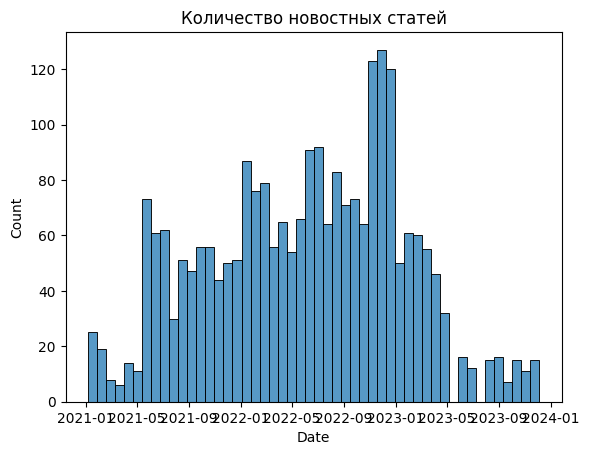

In [21]:
# Изучение распределения количества новостных статей

sns.histplot(news.index, bins=50)
plt.title('Количество новостных статей')
plt.show()

C:\Users\$$$\AppData\Local\Temp\ipykernel_4244\2424022462.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  filtred_news = news.loc[start_date:end_date]


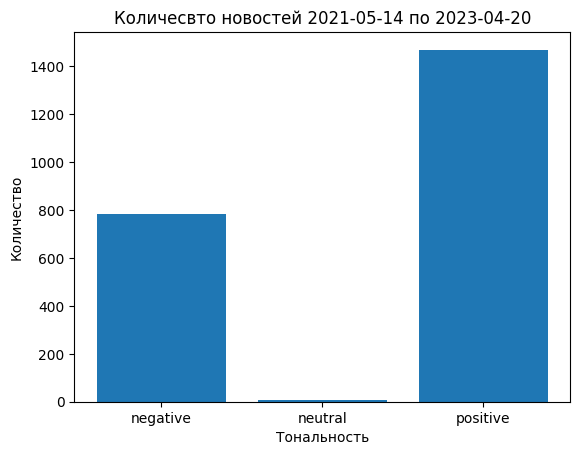

In [23]:
start_date='2021-05-14'
end_date='2023-04-20'

filtred_news = news.loc[start_date:end_date]

sent_count = filtred_news.groupby('Sentiment').size()

plt.bar(sent_count.index, sent_count.values)

plt.title(f'Количесвто новостей {start_date} по {end_date}')
plt.xlabel('Тональность')
plt.ylabel('Количество')
plt.show()

In [22]:
# Подсчет количества новостей по индексу
news_count = news['Sentiment'].value_counts()
news_count

positive    1598
negative     861
neutral        7
Name: Sentiment, dtype: int64

In [28]:
news

Text  \
Date                                                                     
2023-04-20 10:56:00  european parliament on thursday overwhelmingly...   
2023-04-20 10:14:00  major us crypto exchange coinbase global inc c...   
2023-04-19 18:21:00  a former vice president of venezuelas state oi...   
2023-04-19 16:09:00   rest of the world should copy european union ...   
2023-04-19 15:49:00  cybersecurity is a growing concern for investo...   
...                                                                ...   
2021-05-14 18:30:00  elon musks decision to stop accepting bitcoin ...   
2021-05-14 14:29:00   usbased framework ventures the largest ventur...   
2021-05-14 11:07:00  us stocks rallied in a sharp rebound on friday...   
2021-05-14 08:52:00  global stocks rose and the dollar dipped on fr...   
2021-05-14 05:31:00  the dollar took a breather on friday but looks...   

                                                                 Token  \
Date                                                                     
2023-04-20 10:56:00  [european, parliament, thursday, overwhelmingl...   
2023-04-20 10:14:00  [major, u, crypto, exchange, coinbase, global,...   
2023-04-19 18:21:00  [former, vice, president, venezuela, state, oi...   
2023-04-19 16:09:00  [rest, world, copy, european, union, rule, cry...   
2023-04-19 15:49:00  [cybersecurity, growing, concern, investor, en...   
...                                                                ...   
2021-05-14 18:30:00  [elon, musk, decision, stop, accepting, bitcoi...   
2021-05-14 14:29:00  [usbased, framework, venture, largest, venture...   
2021-05-14 11:07:00  [u, stock, rallied, sharp, rebound, friday, in...   
2021-05-14 08:52:00  [global, stock, rose, dollar, dipped, friday, ...   
2021-05-14 05:31:00  [dollar, took, breather, friday, look, set, po...   

                    Sentiment  
Date                           
2023-04-20 10:56:00  positive  
2023-04-20 10:14:00  negative  
2023-04-19 18:21:00  negative  
2023-04-19 16:09:00  positive  
2023-04-19 15:49:00  positive  
...                       ...  
2021-05-14 18:30:00  positive  
2021-05-14 14:29:00  positive  
2021-05-14 11:07:00  negative  
2021-05-14 08:52:00  positive  
2021-05-14 05:31:00  positive  

[2466 rows x 3 columns]

In [23]:
news = news.drop(news[news['Sentiment'] == 'neutral'].index)


In [24]:
df_news = news[['Sentiment']]



In [25]:
df_news

Sentiment
Date                         
2023-04-20 10:56:00  positive
2023-04-20 10:14:00  negative
2023-04-19 18:21:00  negative
2023-04-19 16:09:00  positive
2023-04-19 15:49:00  positive
...                       ...
2021-05-14 18:30:00  positive
2021-05-14 14:29:00  positive
2021-05-14 11:07:00  negative
2021-05-14 08:52:00  positive
2021-05-14 05:31:00  positive

[2459 rows x 1 columns]

Тональность новости также является важным фактором, влияющим на анализ движение цены, поэтому приводим данные в этой колонке к значениям 0 и 1

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_news['Sentiment'] = le.fit_transform(df_news['Sentiment']) # 1 -positive, 0 - negative


C:\Users\$$$\AppData\Local\Temp\ipykernel_12572\1707236512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['Sentiment'] = le.fit_transform(df_news['Sentiment']) # 1 -positive, 0 - negative


In [27]:
df_news

Sentiment
Date                          
2023-04-20 10:56:00          1
2023-04-20 10:14:00          0
2023-04-19 18:21:00          0
2023-04-19 16:09:00          1
2023-04-19 15:49:00          1
...                        ...
2021-05-14 18:30:00          1
2021-05-14 14:29:00          1
2021-05-14 11:07:00          0
2021-05-14 08:52:00          1
2021-05-14 05:31:00          1

[2459 rows x 1 columns]

In [34]:
eth.head()

timestamp  open_price  high_price  low_price  close_price  \
0  2021-05-14 00:00:00     3717.92     3718.76    3706.00      3706.48   
1  2021-05-14 00:01:00     3706.77     3711.69    3697.83      3697.89   
2  2021-05-14 00:02:00     3697.82     3711.58    3691.35      3710.45   
3  2021-05-14 00:03:00     3710.46     3735.00    3709.49      3733.40   
4  2021-05-14 00:04:00     3733.59     3754.06    3729.46      3753.74   

       volume  
0   743.80397  
1  1161.79922  
2  1303.15085  
3  1662.21521  
4  2324.29115

In [28]:
btc['timestamp'] = pd.to_datetime(btc['timestamp'])
eth['timestamp'] = pd.to_datetime(eth['timestamp'])


In [29]:
# Ресемплирование данных по часу
btc_1h = btc.resample('1H', on='timestamp').agg({'open_price':'first', 'high_price':'max', 'low_price':'min', 'close_price':'last', 'volume': 'sum'})
eth_1h = eth.resample('1H', on='timestamp').agg({'open_price':'first', 'high_price':'max', 'low_price':'min', 'close_price':'last', 'volume': 'sum'})

                                      Разведочный анализ

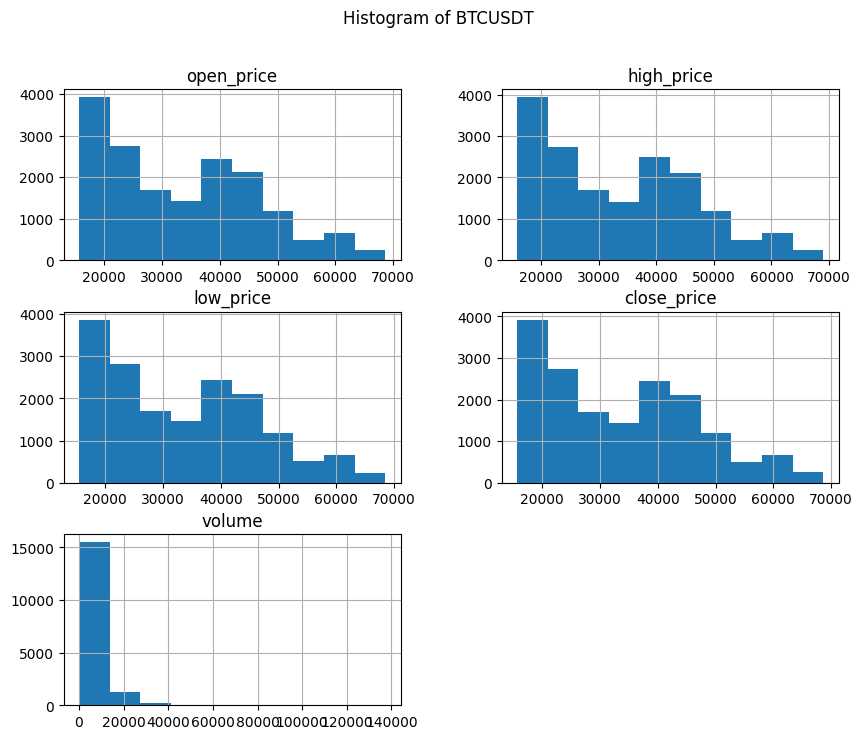

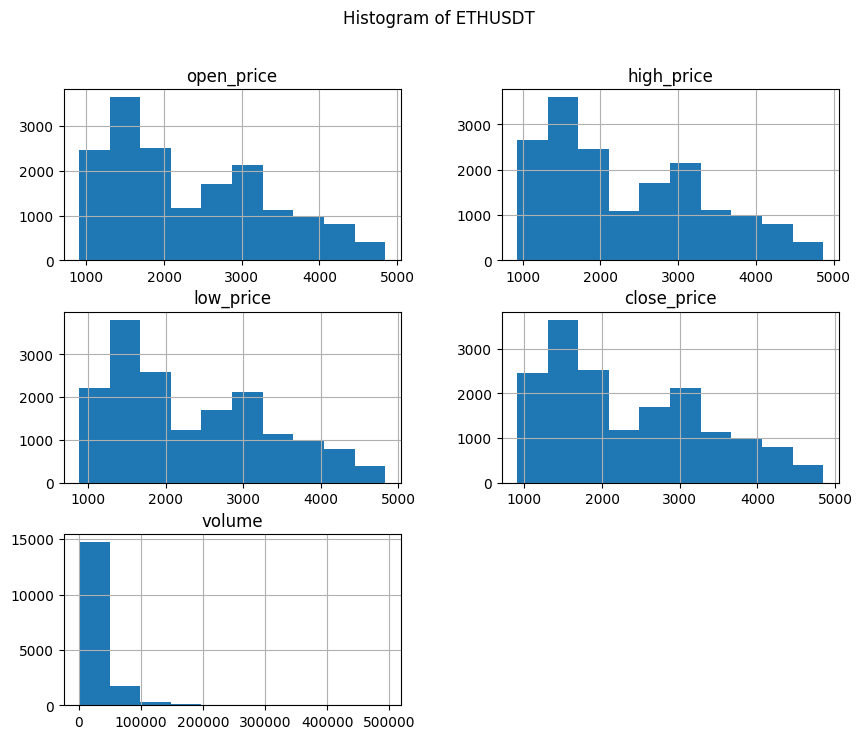

In [164]:
# Гистограмма для BTCUSDT
btc_1h.hist(figsize=(10, 8))
plt.suptitle('Histogram of BTCUSDT')
plt.show()

# Гистограмма для ETHUSDT
eth_1h.hist(figsize=(10, 8))
plt.suptitle('Histogram of ETHUSDT')
plt.show()




<Axes: xlabel='close_price', ylabel='Count'>

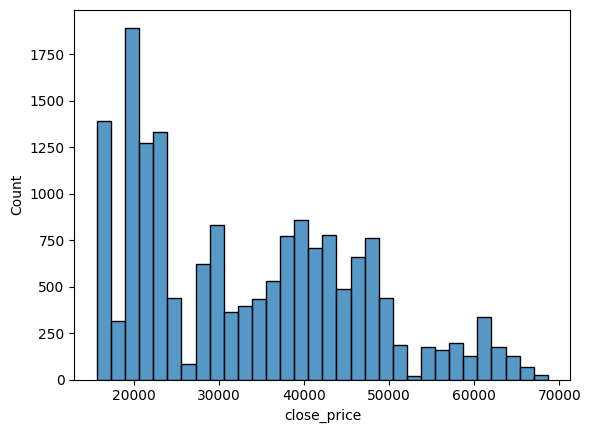

In [37]:
# гистограмма распределения цен на биткоин
sns.histplot(btc_1h['close_price'])


<Axes: xlabel='close_price', ylabel='Count'>

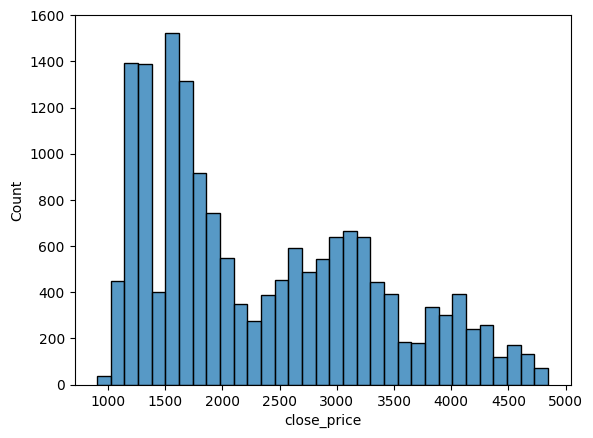

In [38]:
sns.histplot(eth_1h['close_price'])


In [39]:
btc_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16969 entries, 2021-05-14 00:00:00 to 2023-04-21 00:00:00
Freq: H
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   16962 non-null  float64
 1   high_price   16962 non-null  float64
 2   low_price    16962 non-null  float64
 3   close_price  16962 non-null  float64
 4   volume       16969 non-null  float64
dtypes: float64(5)
memory usage: 795.4 KB


In [40]:
eth_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16969 entries, 2021-05-14 00:00:00 to 2023-04-21 00:00:00
Freq: H
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   16962 non-null  float64
 1   high_price   16962 non-null  float64
 2   low_price    16962 non-null  float64
 3   close_price  16962 non-null  float64
 4   volume       16969 non-null  float64
dtypes: float64(5)
memory usage: 795.4 KB


In [30]:
print(btc_1h.isna().sum())
print(eth_1h.isna().sum())


open_price     7
high_price     7
low_price      7
close_price    7
volume         0
dtype: int64
open_price     7
high_price     7
low_price      7
close_price    7
volume         0
dtype: int64


In [31]:
btc_1h.dropna(inplace=True)
eth_1h.dropna(inplace=True)

In [39]:
eth_1h.describe()

open_price    high_price     low_price   close_price         volume
count  16962.000000  16962.000000  16962.000000  16962.000000   16962.000000
mean    2357.264963   2371.999810   2341.636925   2357.159499   28130.811035
std      983.614523    989.443051    977.175540    983.563333   28480.293103
min      904.260000    928.360000    881.560000    904.250000       0.000000
25%     1558.157500   1566.535000   1549.277500   1558.155000   12033.904775
50%     2046.480000   2061.220000   2028.245000   2045.455000   19480.259100
75%     3109.315000   3126.642500   3091.907500   3109.325000   33640.195300
max     4846.940000   4868.000000   4833.190000   4846.710000  493227.882820

In [60]:
btc_1h.describe()

open_price    high_price     low_price   close_price         volume
count  16962.000000  16962.000000  16962.000000  16962.000000   16962.000000
mean   33551.561848  33720.968251  33374.829393  33550.293732    5607.047147
std    13074.528178  13146.971297  12996.846877  13074.006703    6552.386948
min    15648.230000  15769.990000  15476.000000  15649.520000       0.000000
25%    21294.260000  21382.587500  21198.552500  21295.115000    1511.061332
50%    31871.880000  32105.935000  31682.945000  31868.020000    3211.537110
75%    43130.635000  43373.947500  42900.525000  43129.385000    7349.261805
max    68635.120000  69000.000000  68451.190000  68633.690000  137207.188600

<Axes: xlabel='close_price', ylabel='close_price'>

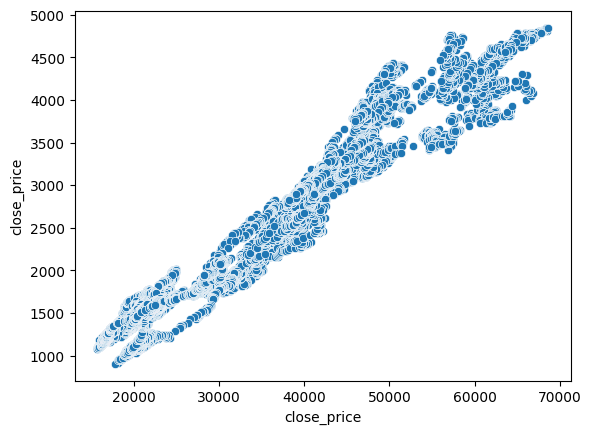

In [45]:
# диаграмма рассеяния между ценами биткоина и эфириума
sns.scatterplot(x=btc_1h['close_price'], y=eth_1h['close_price'])

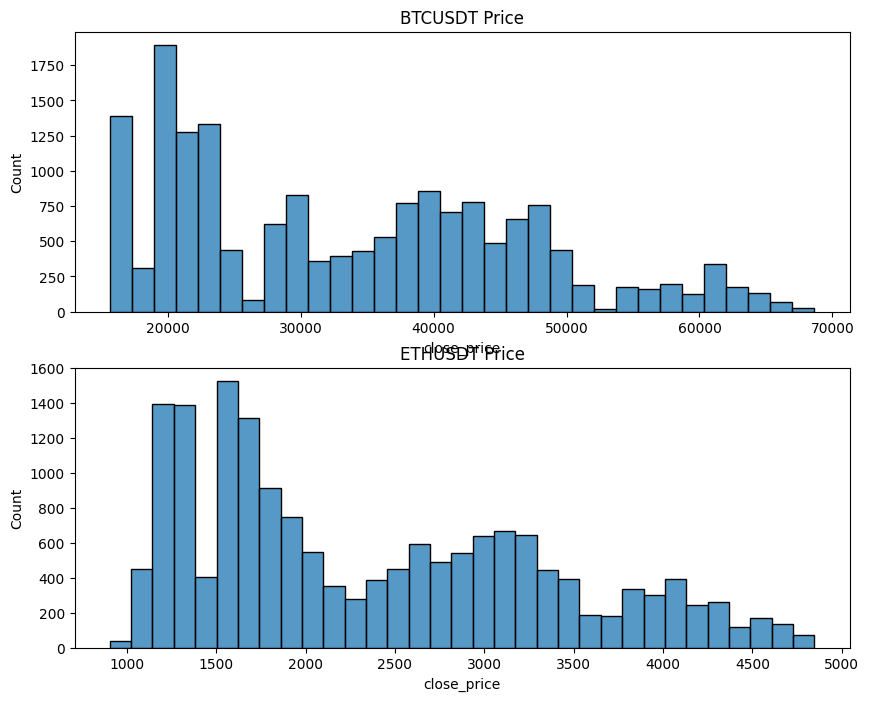

In [173]:
# Изучение распределений цены цифровых активов
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(btc_1h['close_price'], ax=ax[0])
sns.histplot(eth_1h['close_price'], ax=ax[1])
ax[0].set_title('BTCUSDT Price')
ax[1].set_title('ETHUSDT Price')
plt.show()

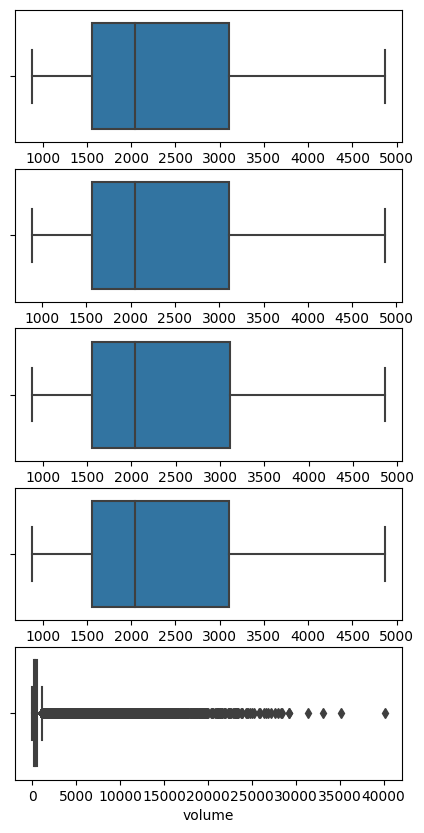

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=5, figsize=(5,10))
sns.boxplot(x=eth['open_price'], ax=axs[0])
sns.boxplot(x=eth['high_price'], ax=axs[1])
sns.boxplot(x=eth['low_price'], ax=axs[2])
sns.boxplot(x=eth['close_price'], ax=axs[3])
sns.boxplot(x=eth['volume'], ax=axs[4])
plt.show()


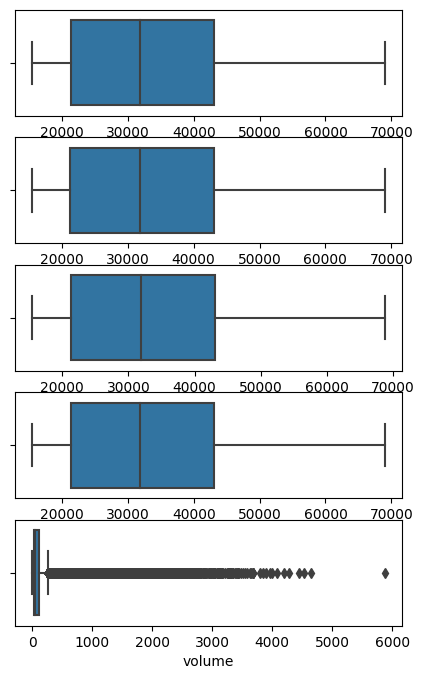

In [47]:
fig, axs = plt.subplots(nrows=5, figsize=(5,8))
sns.boxplot(x=btc['open_price'], ax=axs[0])
sns.boxplot(x=btc['high_price'], ax=axs[1])
sns.boxplot(x=btc['low_price'], ax=axs[2])
sns.boxplot(x=btc['close_price'], ax=axs[3])
sns.boxplot(x=btc['volume'], ax=axs[4])
plt.show()


In [48]:
eth_q1 = eth['volume'].quantile(0.25)
eth_q3 = eth['volume'].quantile(0.75)
eth_iqr = eth_q3 - eth_q1
btc_q1 = btc['volume'].quantile(0.25)
btc_q3 = btc['volume'].quantile(0.75)
btc_iqr = btc_q3 - btc_q1


In [49]:
# Метод межквартильных расстояний
eth_outliers_iqr = (eth['volume'] < (eth_q1 - 1.5 * eth_iqr)) | (eth['volume'] > (eth_q3 + 1.5 * eth_iqr))
btc_outliers_iqr = (btc['volume'] < (btc_q1 - 1.5 * btc_iqr)) | (btc['volume'] > (btc_q3 + 1.5 * btc_iqr))


In [50]:


eth_1h_trans = np.log(eth['volume'] + 1)
btc_1h_trans = np.log(btc['volume'] + 1)


In [51]:
eth_lower_bound = eth_1h_trans.mean() - 3 * eth_1h_trans.std()
eth_upper_bound = eth_1h_trans.mean() + 3 * eth_1h_trans.std()
btc_lower_bound = btc_1h_trans.mean() - 3 * btc_1h_trans.std()
btc_upper_bound = btc_1h_trans.mean() + 3 * btc_1h_trans.std()

eth_no_outliers_transformed = eth_1h_trans[(eth_1h_trans >= eth_lower_bound) & (eth_1h_trans <= eth_upper_bound)]
btc_no_outliers_transformed = btc_1h_trans[(btc_1h_trans >= btc_lower_bound) & (btc_1h_trans <= btc_upper_bound)]

In [52]:
eth_no_outliers = np.exp(eth_no_outliers_transformed) - 1
btc_no_outliers = np.exp(btc_no_outliers_transformed) - 1


In [54]:
# Метод 3-х сигм
eth_outliers_count_sigma = len(eth) - len(eth_no_outliers)
btc_outliers_count_sigma = len(btc) - len(btc_no_outliers)


eth_outliers_count_iqr = eth_outliers_iqr.sum()
btc_outliers_count_iqr = btc_outliers_iqr.sum()

print(f"Метод 3-х сигм: Ethereum выбросов - {eth_outliers_count_sigma}, Bitcoin выбросов - {btc_outliers_count_sigma}")
print(f"Метод межквартильных расстояний: Ethereum выбросов - {eth_outliers_count_iqr}, Bitcoin выбросов - {btc_outliers_count_iqr}")


Метод 3-х сигм: Ethereum выбросов - 5489, Bitcoin выбросов - 1174
Метод межквартильных расстояний: Ethereum выбросов - 94223, Bitcoin выбросов - 79103


In [40]:
data = pd.merge(eth, btc, on='timestamp', how='inner')

C:\Users\$$$\AppData\Local\Temp\ipykernel_4244\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

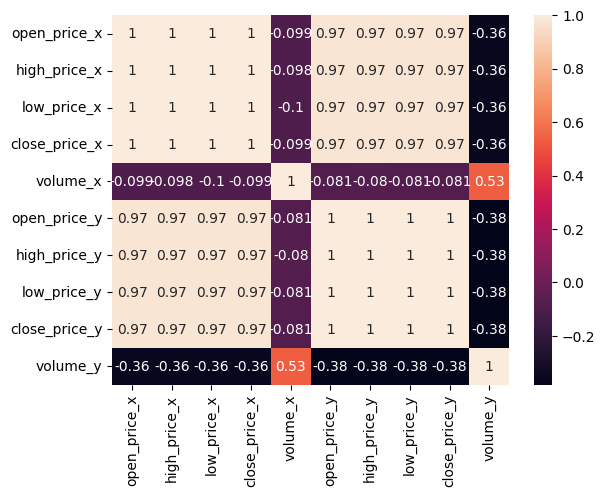

In [56]:
sns.heatmap(data.corr(), annot=True)

In [32]:
btc.set_index('timestamp', inplace=True)
btc.index = pd.to_datetime(btc.index)
eth.set_index('timestamp', inplace=True)
eth.index = pd.to_datetime(eth.index)

In [33]:
btc = btc[['open_price', 'high_price', 'low_price', 'close_price']]
eth = eth[['open_price', 'high_price', 'low_price', 'close_price']]

In [34]:
btc.isna().sum()

open_price     0
high_price     0
low_price      0
close_price    0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# нормализациия каждого признака
btc_norm = scaler.fit_transform(btc)
eth_norm = scaler.fit_transform(eth)

# создаются списки с названиями признаков
cols = ['open_price', 'high_price', 'low_price', 'close_price']


Минимальное значение open_price до нормализации: 15513.84
Максимальное значение open_price до нормализации: 69000.0
Минимальное значение open_price после нормализации: -1.3795768849230678
Максимальное значение open_price после нормализации: 2.71151311488383


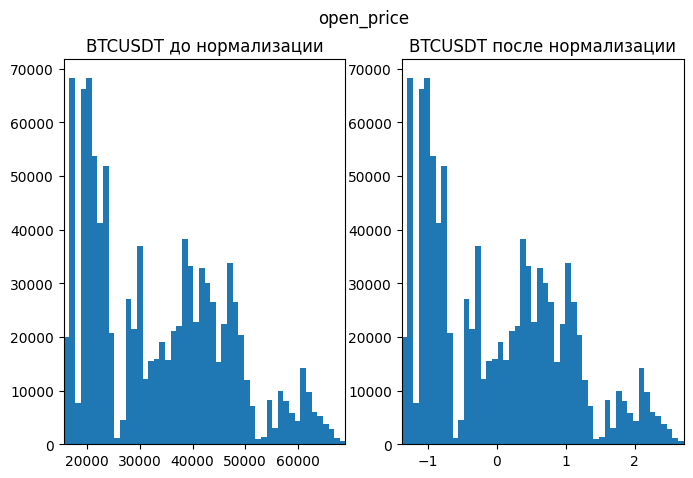

Минимальное значение high_price до нормализации: 15544.47
Максимальное значение high_price до нормализации: 69000.0
Минимальное значение high_price после нормализации: -1.3778787250945377
Максимальное значение high_price после нормализации: 2.70834783924653


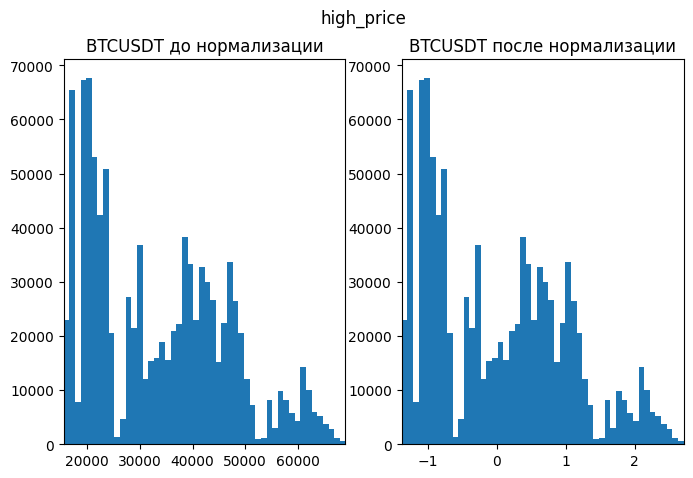

Минимальное значение low_price до нормализации: 15476.0
Максимальное значение low_price до нормализации: 68786.7
Минимальное значение low_price после нормализации: -1.381862500451395
Максимальное значение low_price после нормализации: 2.698376448764745


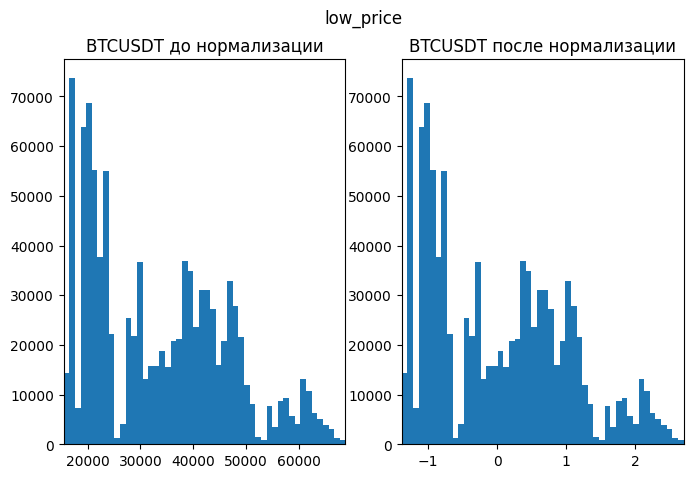

Минимальное значение close_price до нормализации: 15513.84
Максимальное значение close_price до нормализации: 69000.0
Минимальное значение close_price после нормализации: -1.3795759907831897
Максимальное значение close_price после нормализации: 2.711517067682819


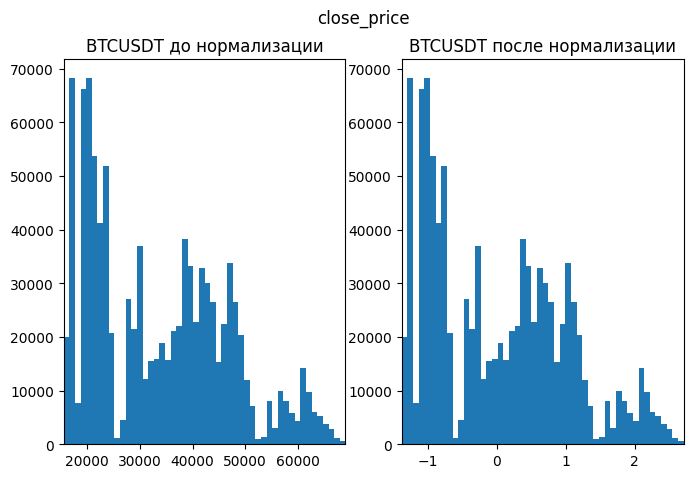

In [248]:

# Строим графики распределения до и после нормализации для каждого признака
for col in cols:
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    fig.suptitle(col)
    
    # график до нормализации
    ax[0].hist(btc[col], bins=50)
    ax[0].set_title('BTCUSDT до нормализации')
    ax[0].set_xlim([btc[col].min(), btc[col].max()])
    
    print(f"Минимальное значение {col} до нормализации: {btc[col].min()}")
    print(f"Максимальное значение {col} до нормализации: {btc[col].max()}")
    
    # график после нормализации
    ax[1].hist(btc_norm[:, cols.index(col)], bins=50)
    ax[1].set_title('BTCUSDT после нормализации')
    ax[1].set_xlim([btc_norm[:, cols.index(col)].min(), btc_norm[:, cols.index(col)].max()])
    
    print(f"Минимальное значение {col} после нормализации: {btc_norm[:, cols.index(col)].min()}")
    print(f"Максимальное значение {col} после нормализации: {btc_norm[:, cols.index(col)].max()}")
    
    plt.show()


Минимальное значение open_price до нормализации: 886.03
Максимальное значение open_price до нормализации: 4865.22
Минимальное значение open_price после нормализации: -1.495676514514975
Максимальное значение open_price после нормализации: 2.5497934177623947


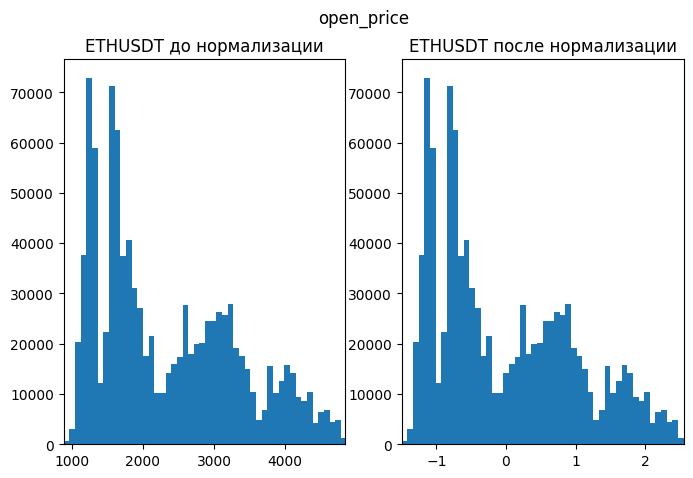

Минимальное значение high_price до нормализации: 892.42
Максимальное значение high_price до нормализации: 4868.0
Минимальное значение high_price после нормализации: -1.4898132818991419
Максимальное значение high_price после нормализации: 2.549089376874696


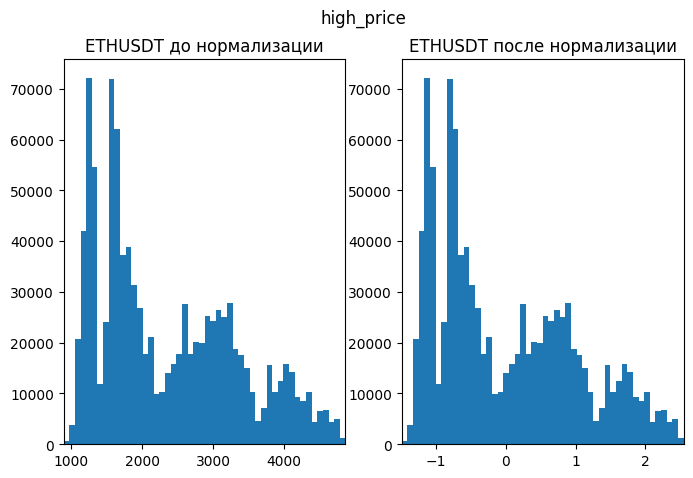

Минимальное значение low_price до нормализации: 881.56
Максимальное значение low_price до нормализации: 4861.38
Минимальное значение low_price после нормализации: -1.4996371298046778
Максимальное значение low_price после нормализации: 2.549455315183893


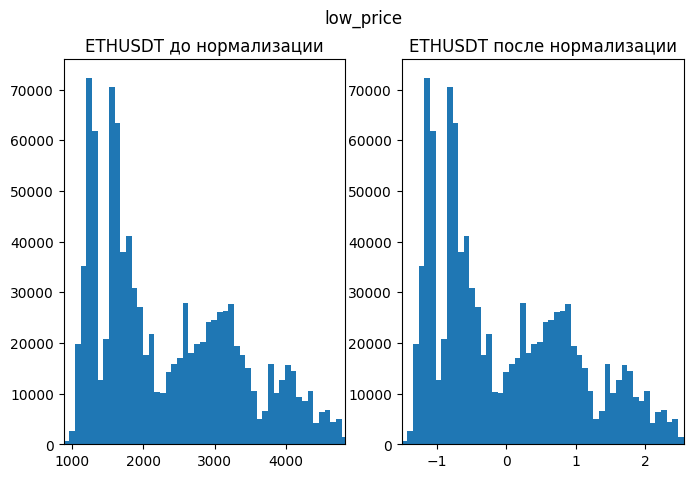

Минимальное значение close_price до нормализации: 886.03
Максимальное значение close_price до нормализации: 4865.22
Минимальное значение close_price после нормализации: -1.4956759520803136
Максимальное значение close_price после нормализации: 2.5497976598339784


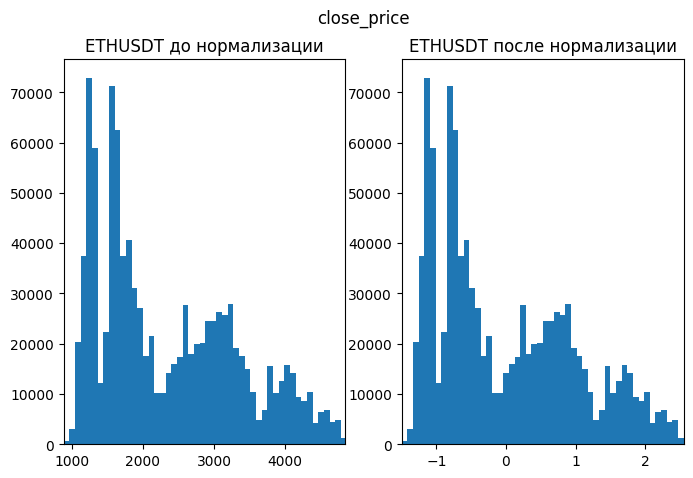

In [74]:
for col in cols:
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    fig.suptitle(col)
    
    # график до нормализации
    ax[0].hist(eth[col], bins=50)
    ax[0].set_title('ETHUSDT до нормализации')
    ax[0].set_xlim([eth[col].min(), eth_1h[col].max()])

    print(f"Минимальное значение {col} до нормализации: {eth[col].min()}")
    print(f"Максимальное значение {col} до нормализации: {eth[col].max()}")

    # график после нормализации
    ax[1].hist(eth_norm[:, cols.index(col)], bins=50)
    ax[1].set_title('ETHUSDT после нормализации')
    ax[1].set_xlim([eth_norm[:, cols.index(col)].min(), eth_norm[:, cols.index(col)].max()])
    
    print(f"Минимальное значение {col} после нормализации: {eth_norm[:, cols.index(col)].min()}")
    print(f"Максимальное значение {col} после нормализации: {eth_norm[:, cols.index(col)].max()}")
    plt.show()


Поскольку данные состоят из цен с интервалом в 1 минуту, были созданы дополнительные признаки на основе временного сдвига. Добавила столбец с разницей цен закрытия за 15, 30 и 60 минут после выхода новости

In [36]:
eth

open_price  high_price  low_price  close_price
timestamp                                                          
2021-05-14 00:00:00     3717.92     3718.76    3706.00      3706.48
2021-05-14 00:01:00     3706.77     3711.69    3697.83      3697.89
2021-05-14 00:02:00     3697.82     3711.58    3691.35      3710.45
2021-05-14 00:03:00     3710.46     3735.00    3709.49      3733.40
2021-05-14 00:04:00     3733.59     3754.06    3729.46      3753.74
...                         ...         ...        ...          ...
2023-04-20 23:56:00     1944.00     1944.00    1942.10      1943.10
2023-04-20 23:57:00     1943.10     1943.41    1942.21      1943.40
2023-04-20 23:58:00     1943.41     1943.43    1942.34      1942.66
2023-04-20 23:59:00     1942.65     1942.99    1942.65      1942.98
2023-04-21 00:00:00     1942.98     1942.99    1942.58      1942.59

[1017611 rows x 4 columns]

In [37]:
eth_close = eth[['close_price']]
eth_close 

close_price
timestamp                       
2021-05-14 00:00:00      3706.48
2021-05-14 00:01:00      3697.89
2021-05-14 00:02:00      3710.45
2021-05-14 00:03:00      3733.40
2021-05-14 00:04:00      3753.74
...                          ...
2023-04-20 23:56:00      1943.10
2023-04-20 23:57:00      1943.40
2023-04-20 23:58:00      1942.66
2023-04-20 23:59:00      1942.98
2023-04-21 00:00:00      1942.59

[1017611 rows x 1 columns]

In [38]:
btc_close = btc[['close_price']]
btc_close 

close_price
timestamp                       
2021-05-14 00:00:00     49606.05
2021-05-14 00:01:00     49574.03
2021-05-14 00:02:00     49761.62
2021-05-14 00:03:00     49939.24
2021-05-14 00:04:00     49995.50
...                          ...
2023-04-20 23:56:00     28243.43
2023-04-20 23:57:00     28250.99
2023-04-20 23:58:00     28239.57
2023-04-20 23:59:00     28243.65
2023-04-21 00:00:00     28234.00

[1017611 rows x 1 columns]

In [39]:
df_news_eth = df_news[['Sentiment']]

In [40]:
def calculate_pct_change(data, news_timestamp, periods):
    try:
        news_timestamp_loc = data.index.get_loc(news_timestamp)
    except KeyError:
        return None

    start_price = data.at[news_timestamp, 'close_price']
    end_timestamp = news_timestamp + pd.Timedelta(minutes=periods)

    try:
        end_timestamp_loc = data.index.get_loc(end_timestamp)
    except KeyError:
        return None

    end_price = data.at[end_timestamp, 'close_price']
    pct_change =((end_price - start_price) / start_price) * 100 
    return pct_change

time_shifts = [ 15, 30, 60]
crypto_data = {
    'btc': btc_close
    
}

for shift in time_shifts:
    for currency in ['btc']:
        after_col_name = f'{currency}_pct_after_{shift}m'
        
        df_news[after_col_name] = df_news.index.map(
            lambda x: calculate_pct_change(crypto_data[currency], x, shift))

C:\Users\$$$\AppData\Local\Temp\ipykernel_12572\934438475.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news[after_col_name] = df_news.index.map(


In [41]:
df_news.isna().sum()

Sentiment              0
btc_pct_after_15m    207
btc_pct_after_30m    208
btc_pct_after_60m    208
dtype: int64

In [42]:
df_news['btc_pct_after_15m'].interpolate(method='linear', inplace=True)
df_news['btc_pct_after_30m'].interpolate(method='linear', inplace=True)
df_news['btc_pct_after_60m'].interpolate(method='linear', inplace=True)


In [51]:
df_news

Sentiment  btc_pct_after_15m  btc_pct_after_30m  \
Date                                                                   
2023-04-20 10:56:00          1          -0.252098          -0.315859   
2023-04-20 10:14:00          0          -0.053584          -0.001908   
2023-04-19 18:21:00          0          -0.255221          -0.167771   
2023-04-19 16:09:00          1           0.089159           0.138161   
2023-04-19 15:49:00          1           0.102556           0.393964   
...                        ...                ...                ...   
2021-05-14 18:30:00          1          -0.046077          -0.122900   
2021-05-14 14:29:00          1          -0.083339           0.611575   
2021-05-14 11:07:00          0          -0.240372          -0.621338   
2021-05-14 08:52:00          1          -0.015721           0.405554   
2021-05-14 05:31:00          1           0.694150           0.821679   

                     btc_pct_after_60m  
Date                                    
2023-04-20 10:56:00          -0.754319  
2023-04-20 10:14:00          -0.193006  
2023-04-19 18:21:00          -0.003583  
2023-04-19 16:09:00           0.017996  
2023-04-19 15:49:00           0.331047  
...                                ...  
2021-05-14 18:30:00          -0.494807  
2021-05-14 14:29:00           1.527671  
2021-05-14 11:07:00          -0.671905  
2021-05-14 08:52:00           0.289681  
2021-05-14 05:31:00          -0.344126  

[2459 rows x 4 columns]

In [43]:
time_shifts = [ 15, 30, 60]
crypto_data = {
    'eth': eth_close
    
}

for shift in time_shifts:
    for currency in ['eth']:
        after_col_name = f'{currency}_pct_after_{shift}m'
        
        df_news_eth[after_col_name] = df_news_eth.index.map(
            lambda x: calculate_pct_change(crypto_data[currency], x, shift))

In [53]:
df_news_eth

Sentiment  eth_pct_after_15m  eth_pct_after_30m  \
Date                                                                   
2023-04-20 10:56:00          1          -0.256381          -0.242564   
2023-04-20 10:14:00          0          -0.173801          -0.146197   
2023-04-19 18:21:00          0          -0.293929          -0.182317   
2023-04-19 16:09:00          1           0.102871           0.097829   
2023-04-19 15:49:00          1           0.041937           0.462825   
...                        ...                ...                ...   
2021-05-14 18:30:00          1          -0.411197          -0.110255   
2021-05-14 14:29:00          1           0.119917           1.058485   
2021-05-14 11:07:00          0          -0.097524          -0.410048   
2021-05-14 08:52:00          1          -0.096584           0.638884   
2021-05-14 05:31:00          1           0.817353           1.226292   

                     eth_pct_after_60m  
Date                                    
2023-04-20 10:56:00          -0.613575  
2023-04-20 10:14:00          -0.371116  
2023-04-19 18:21:00           0.159590  
2023-04-19 16:09:00          -0.222384  
2023-04-19 15:49:00           0.118738  
...                                ...  
2021-05-14 18:30:00          -0.649309  
2021-05-14 14:29:00           2.009663  
2021-05-14 11:07:00          -0.301550  
2021-05-14 08:52:00           0.606264  
2021-05-14 05:31:00           0.065220  

[2459 rows x 4 columns]

In [44]:
df_news_eth.isna().sum()

Sentiment              0
eth_pct_after_15m    207
eth_pct_after_30m    208
eth_pct_after_60m    208
dtype: int64

In [45]:
df_news_eth['eth_pct_after_15m'].interpolate(method='linear', inplace=True)
df_news_eth['eth_pct_after_30m'].interpolate(method='linear', inplace=True)
df_news_eth['eth_pct_after_60m'].interpolate(method='linear', inplace=True)

Разработка и Обучение модолей

In [46]:
df_news = df_news.reset_index()


In [47]:
df_news_eth  = df_news_eth.reset_index()

In [48]:
btc = btc.reset_index().rename(columns={'timestamp': 'Date'})

In [59]:
eth = eth.reset_index().rename(columns={'timestamp': 'Date'})

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Обработка данных
merge_btc = pd.merge(df_news, btc, on='Date', how='inner')
merge_btc.set_index(pd.to_datetime(merge_btc['Date']), inplace=True)
merge_btc.drop('Date', axis=1, inplace=True)
merge_btc.dropna(inplace=True)

merge_btc['target'] = (merge_btc['btc_pct_after_60m'] > 0).astype(int)



Обработка данных eth

In [115]:
# Обработка данных
merge_eth = pd.merge(df_news_eth, eth, on='Date', how='inner')
merge_eth.set_index(pd.to_datetime(merge_eth['Date']), inplace=True)
merge_eth.drop('Date', axis=1, inplace=True)
merge_eth.dropna(inplace=True)

merge_eth['target'] = (merge_eth['eth_pct_after_60m'] > 0).astype(int)


 Матрица рассеяния

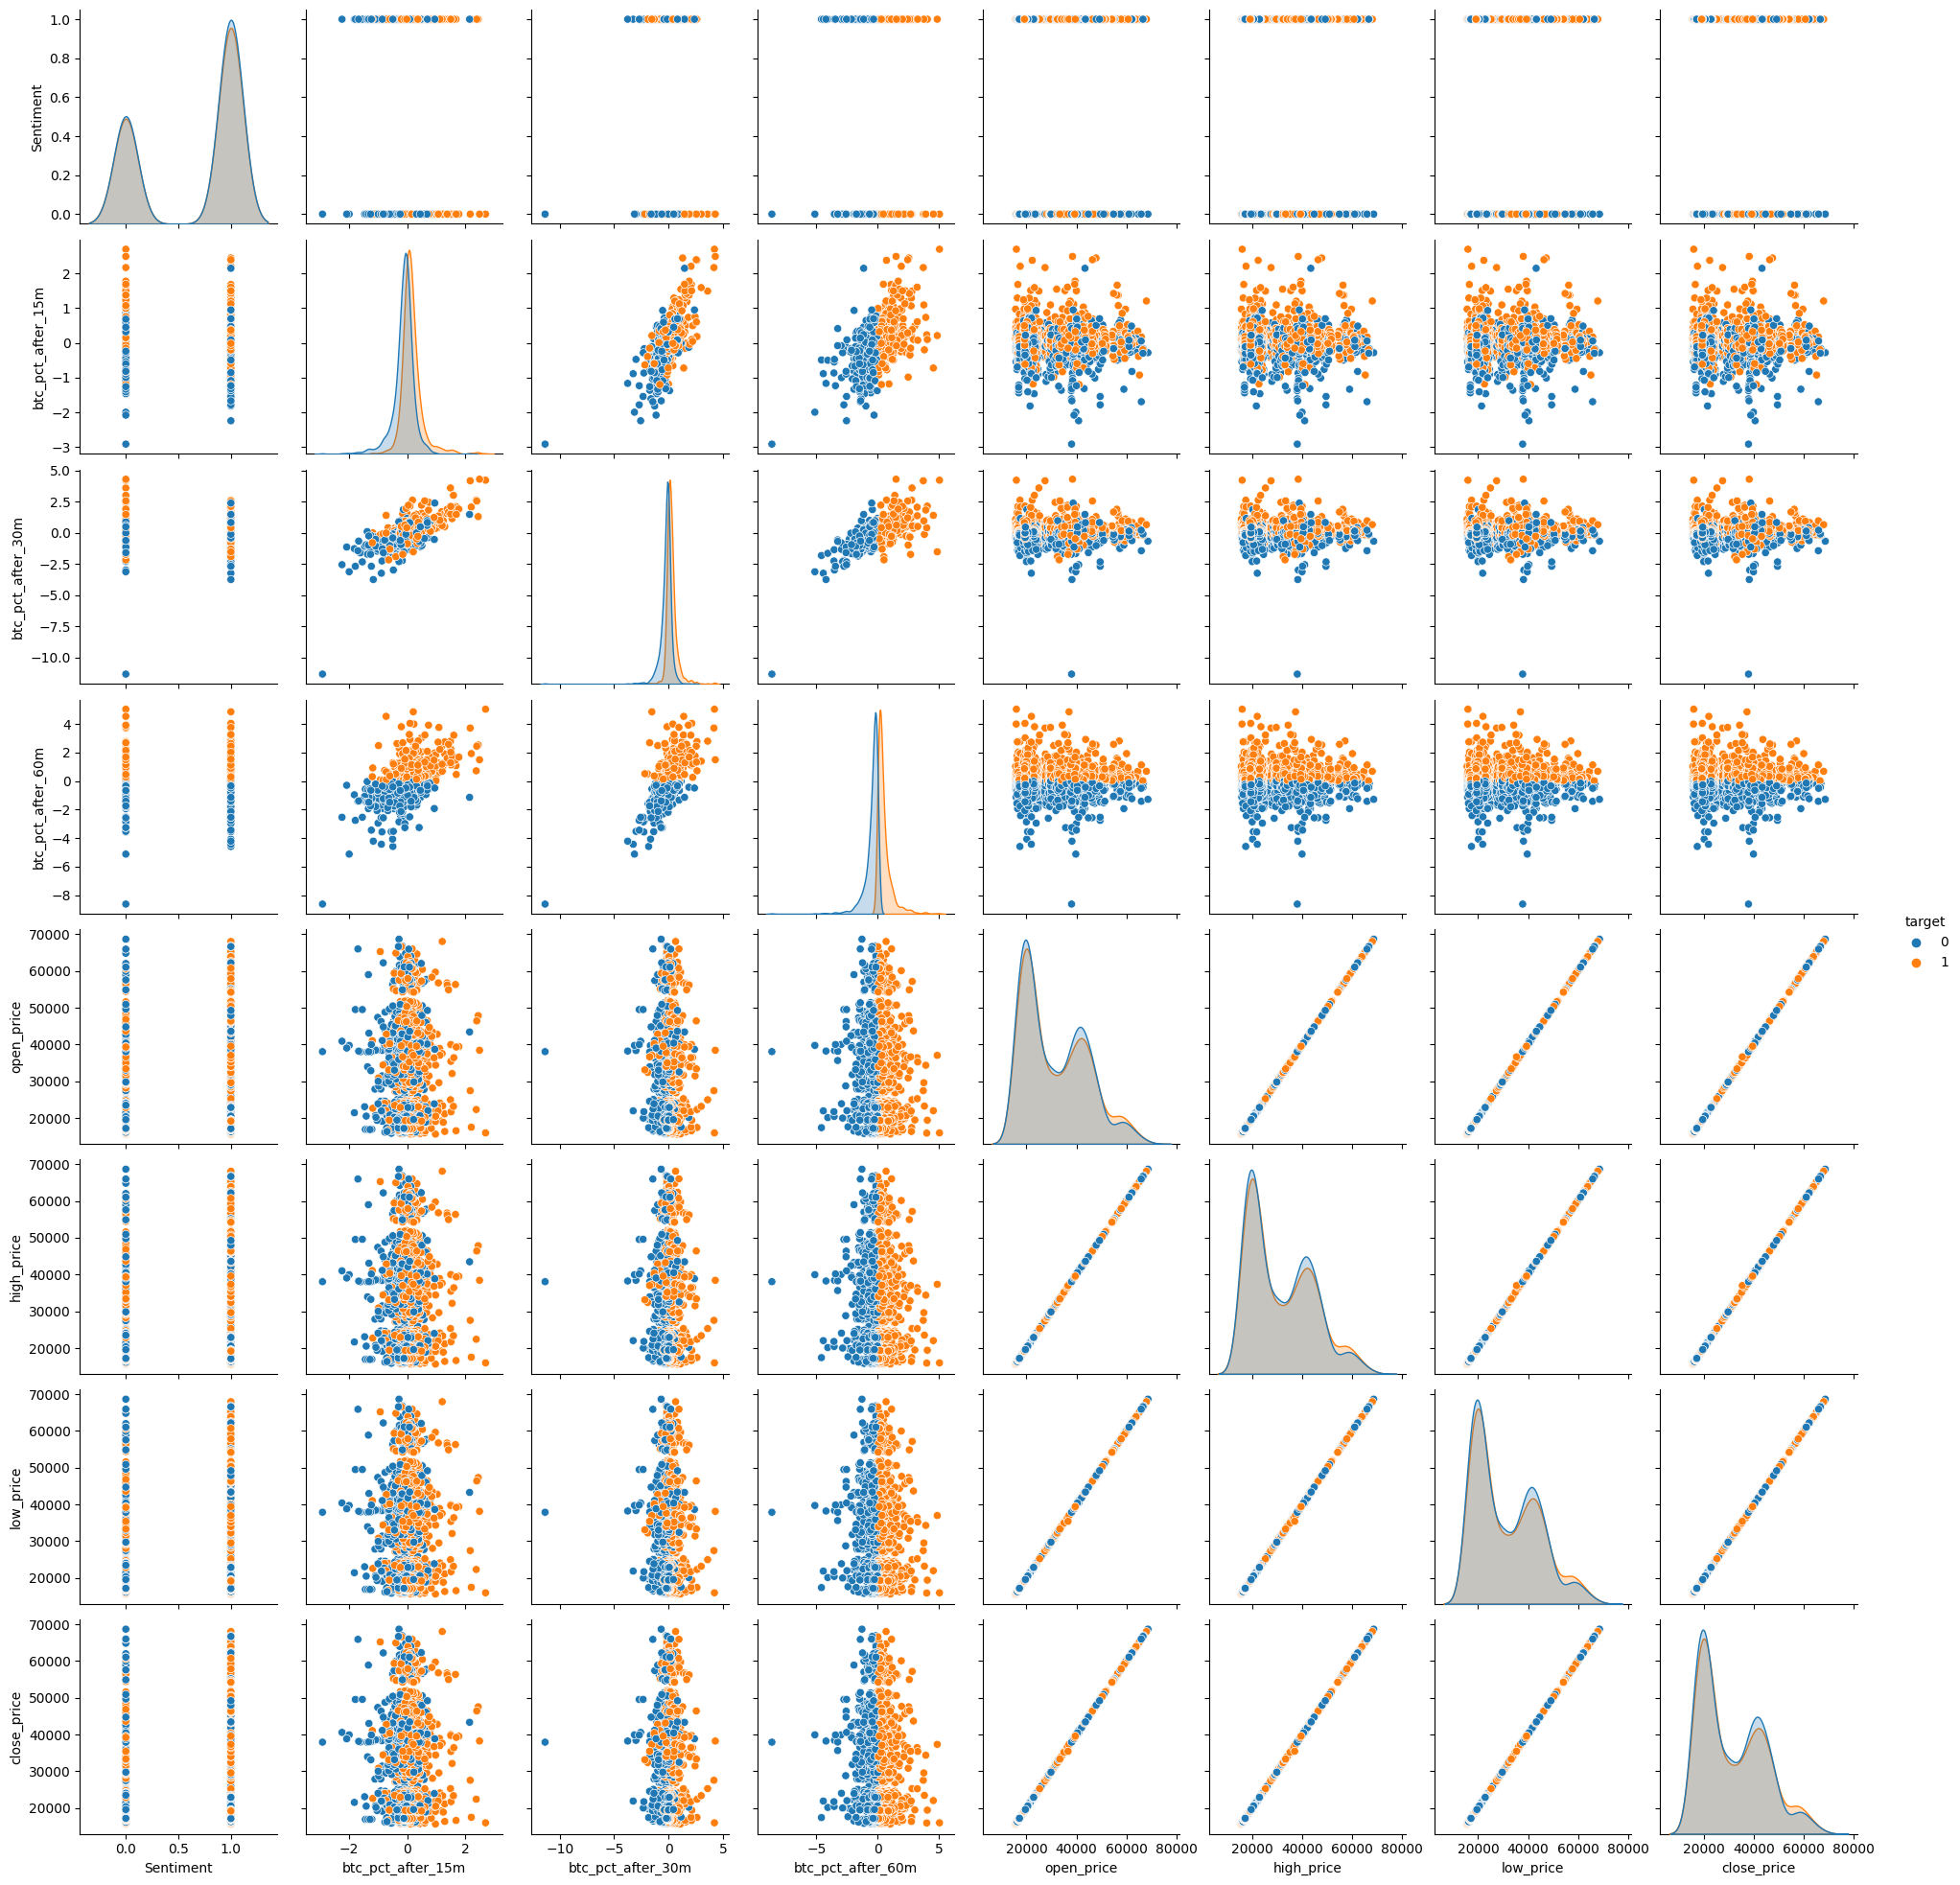

In [62]:
import seaborn as sns

sns.pairplot(merge_eth, hue='target')

In [116]:
Q1 = merge_eth.quantile(0.25)
Q3 = merge_eth.quantile(0.75)
IQR = Q3 - Q1
df_eth = merge_eth[(merge_eth >= Q1 - 1.5*IQR) & (merge_eth <= Q3 + 1.5*IQR)]

In [117]:
df_eth.isna().sum()

index                  0
Sentiment              0
eth_pct_after_15m    178
eth_pct_after_30m    202
eth_pct_after_60m    192
open_price             0
high_price             0
low_price              0
close_price            0
target                 0
dtype: int64

In [118]:
df_eth['eth_pct_after_15m'].interpolate(method='linear', inplace=True)
df_eth['eth_pct_after_30m'].interpolate(method='linear', inplace=True)
df_eth['eth_pct_after_60m'].interpolate(method='linear', inplace=True)

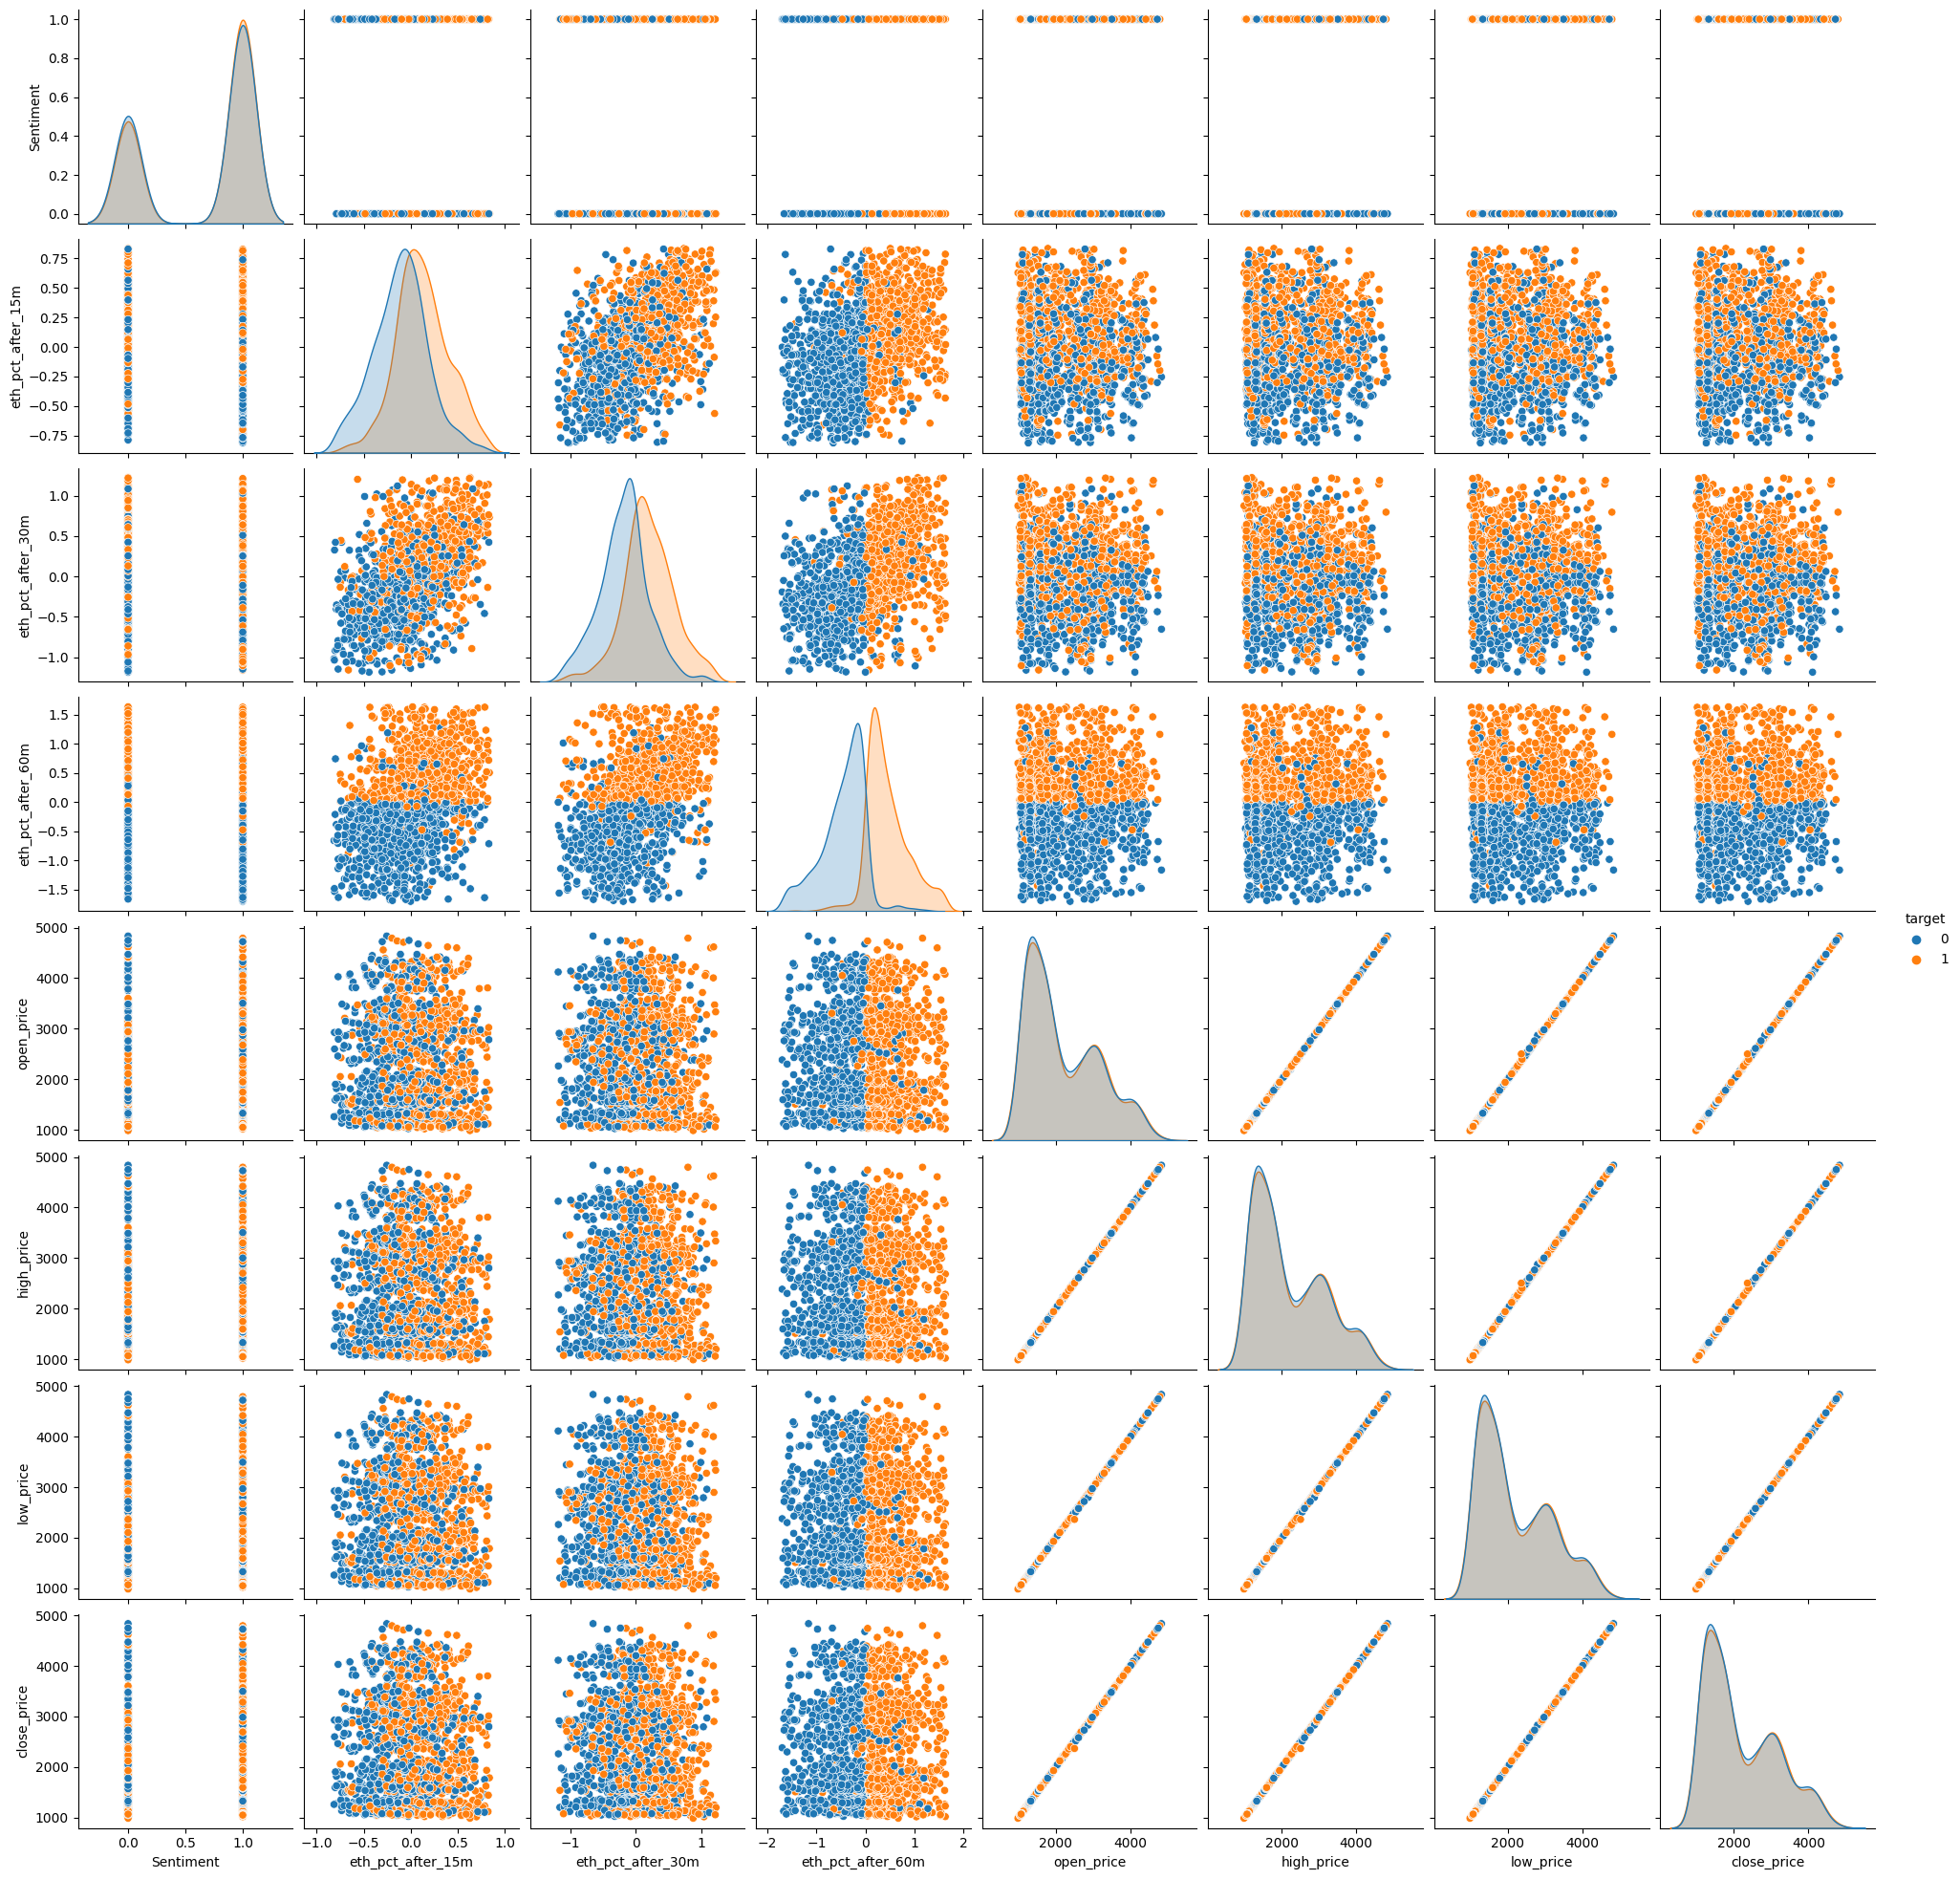

In [309]:
sns.pairplot(df_eth, hue='target')

In [ ]:
import seaborn as sns

sns.pairplot(merge_btc, hue='target')

In [50]:
Q1 = merge_btc.quantile(0.25)
Q3 = merge_btc.quantile(0.75)
IQR = Q3 - Q1
df_btc = merge_btc[(merge_btc >= Q1 - 1.5*IQR) & (merge_btc <= Q3 + 1.5*IQR)]

In [51]:
df_btc.isna().sum()

Sentiment              0
btc_pct_after_15m    190
btc_pct_after_30m    202
btc_pct_after_60m    210
open_price             0
high_price             0
low_price              0
close_price            0
target                 0
dtype: int64

In [52]:
df_btc['btc_pct_after_15m'].interpolate(method='linear', inplace=True)
df_btc['btc_pct_after_30m'].interpolate(method='linear', inplace=True)
df_btc['btc_pct_after_60m'].interpolate(method='linear', inplace=True)

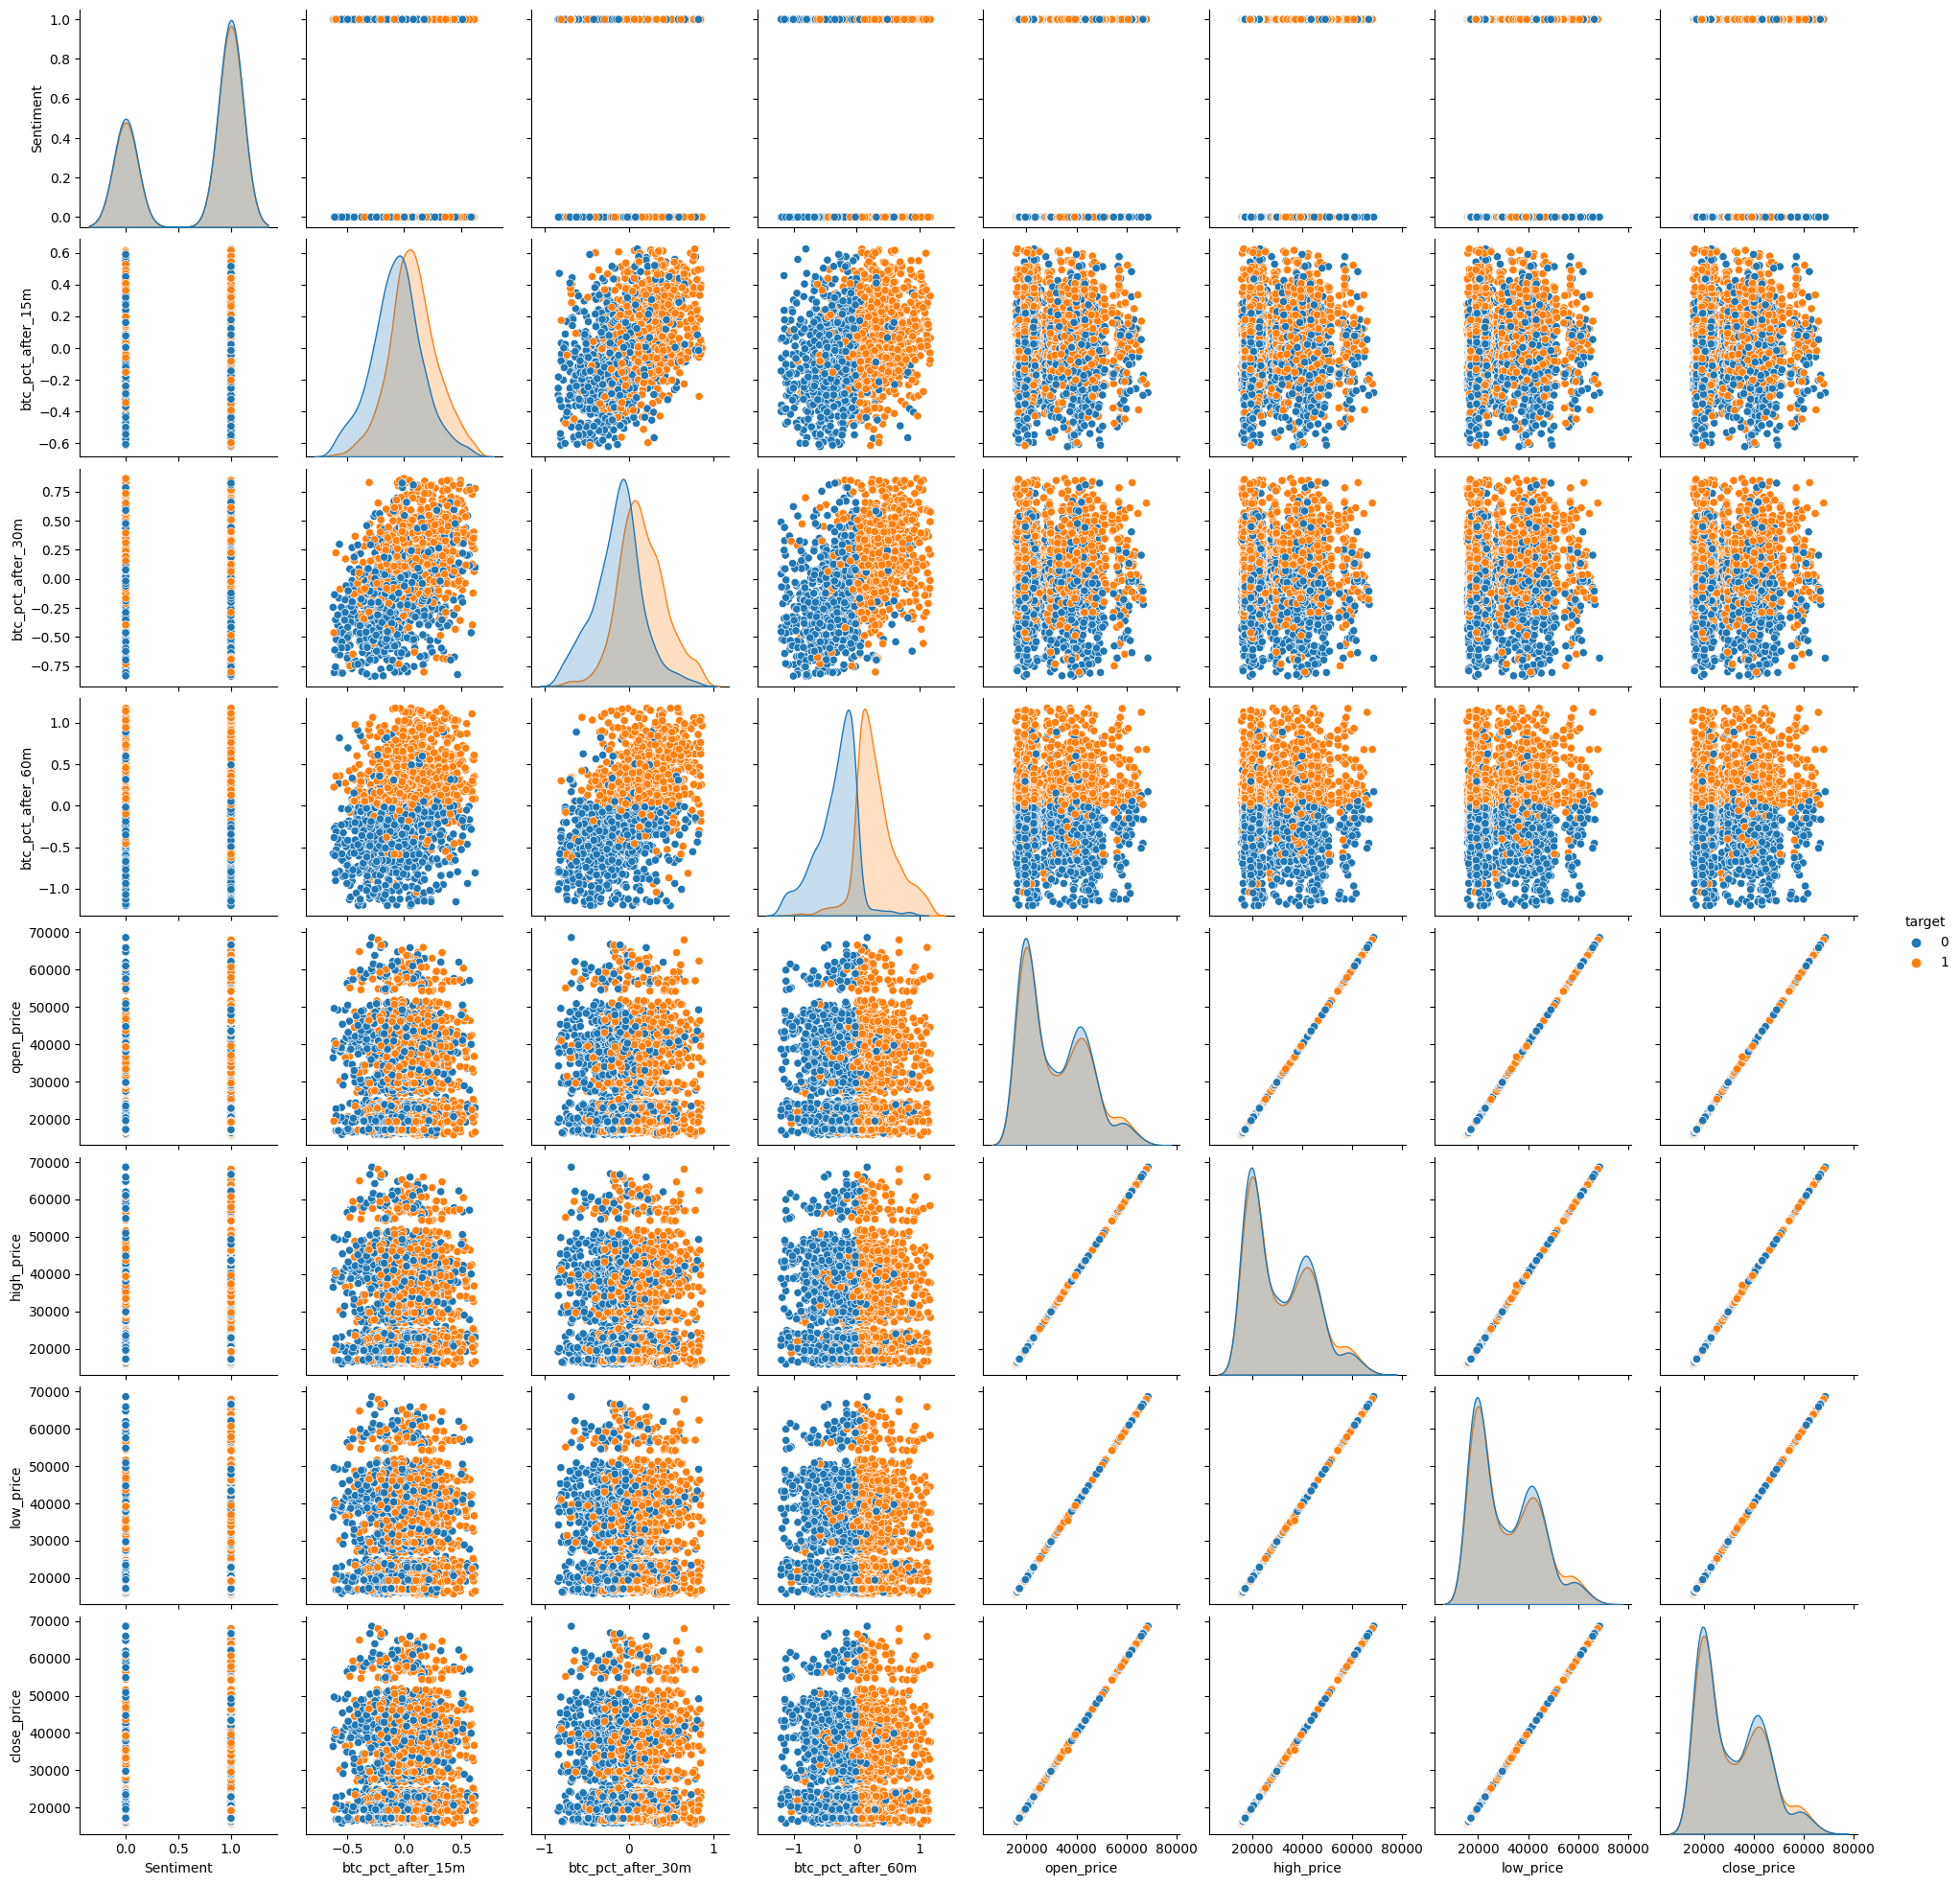

In [277]:
sns.pairplot(df_btc, hue='target')

<Axes: >

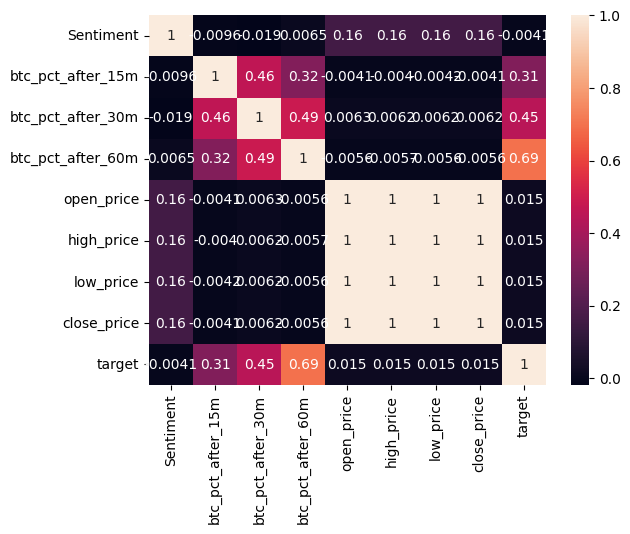

In [66]:
sns.heatmap(df_btc.corr(), annot=True)

In [119]:
X = df_eth.drop(['eth_pct_after_60m', 'target'], axis=1)
y = df_eth['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)



In [53]:
X = df_btc.drop(['btc_pct_after_60m', 'target'], axis=1)
y = df_btc['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

# Сохранение scaler в файл
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [56]:
df_btc.head()

Sentiment  btc_pct_after_15m  btc_pct_after_30m  \
Date                                                                   
2023-04-20 10:56:00          1          -0.252098          -0.315859   
2023-04-20 10:14:00          0          -0.053584          -0.001908   
2023-04-19 18:21:00          0          -0.255221          -0.167771   
2023-04-19 16:09:00          1           0.089159           0.138161   
2023-04-19 15:49:00          1           0.102556           0.393964   

                     btc_pct_after_60m  open_price  high_price  low_price  \
Date                                                                        
2023-04-20 10:56:00          -0.754319    28852.13    28857.81   28852.13   
2023-04-20 10:14:00          -0.193006    28843.73    28843.74   28833.36   
2023-04-19 18:21:00          -0.003583    29309.21    29309.22   29303.87   
2023-04-19 16:09:00           0.017996    29289.51    29295.77   29280.04   
2023-04-19 15:49:00           0.331047    29197.01    29214.51   29197.00   

                     close_price  target  
Date                                      
2023-04-20 10:56:00     28857.80       0  
2023-04-20 10:14:00     28833.36       0  
2023-04-19 18:21:00     29307.89       0  
2023-04-19 16:09:00     29284.73       1  
2023-04-19 15:49:00     29213.35       1

In [54]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2252 entries, 2023-04-20 10:56:00 to 2021-05-14 05:31:00
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sentiment          2252 non-null   int32  
 1   btc_pct_after_15m  2252 non-null   float64
 2   btc_pct_after_30m  2252 non-null   float64
 3   btc_pct_after_60m  2252 non-null   float64
 4   open_price         2252 non-null   float64
 5   high_price         2252 non-null   float64
 6   low_price          2252 non-null   float64
 7   close_price        2252 non-null   float64
 8   target             2252 non-null   int32  
dtypes: float64(7), int32(2)
memory usage: 158.3 KB


                                    Разработка и обучение моделей

Логистическая регрессия

In [123]:
from sklearn.linear_model import LogisticRegression

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train_scal, y_train)

# Оценка модели
y_pred = logreg.predict(X_test_scal)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[254  92]
 [103 227]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       346
           1       0.71      0.69      0.70       330

    accuracy                           0.71       676
   macro avg       0.71      0.71      0.71       676
weighted avg       0.71      0.71      0.71       676



Дерево решений

In [124]:
from sklearn.tree import DecisionTreeClassifier

# Создание объекта дерева решений
dt_classifier = DecisionTreeClassifier()

# Обучение модели на обучающем наборе данных
dt_classifier.fit(X_train_scal, y_train)

# Предсказание на тестовом наборе данных
y_pred = dt_classifier.predict(X_test_scal)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[197 149]
 [116 214]]
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       346
           1       0.59      0.65      0.62       330

    accuracy                           0.61       676
   macro avg       0.61      0.61      0.61       676
weighted avg       0.61      0.61      0.61       676



Случайный лес

In [125]:

from sklearn.ensemble import RandomForestClassifier

# Создание объекта Случайный лес
rf_classifier = RandomForestClassifier()

# Обучение модели на обучающем наборе данных
rf_classifier.fit(X_train_scal, y_train)

# Предсказание на тестовом наборе данных
y_pred = rf_classifier.predict(X_test_scal)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[228 118]
 [111 219]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       346
           1       0.65      0.66      0.66       330

    accuracy                           0.66       676
   macro avg       0.66      0.66      0.66       676
weighted avg       0.66      0.66      0.66       676



Градиентный бустинг

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Создание и обучение модели градиентного бустинга
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scal, y_train)

# Предсказание на тестовых данных
y_pred = gb_clf.predict(X_test_scal)

# Оценка результатов
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[249  97]
 [113 217]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       346
           1       0.69      0.66      0.67       330

    accuracy                           0.69       676
   macro avg       0.69      0.69      0.69       676
weighted avg       0.69      0.69      0.69       676



Метод опорных векторов (SVM)

In [127]:

# Создание и обучение модели SVM с радиальным базисным ядром (RBF kernel)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scal, y_train)

# Предсказание на тестовой выборке
y_pred = svm_model.predict(X_test_scal)

# Оценка качества модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[244 102]
 [101 229]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       346
           1       0.69      0.69      0.69       330

    accuracy                           0.70       676
   macro avg       0.70      0.70      0.70       676
weighted avg       0.70      0.70      0.70       676



                                    Нейронные сети 

MLP

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.utils import np_utils

# Создание и компиляция модели
model = Sequential()
model.add(Dense(32, input_dim=X_train_scal.shape[1], activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


# Обучение модели
history = model.fit(X_train_scal, y_train, validation_data=(X_test_scal, y_test), epochs=50, batch_size=32)

# Сохранение модели
model.save("trained_mlp.h5")

# Оценка качества модели на тестовых данных
scores = model.evaluate(X_test_scal, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1/50
50/50 [==============================] - 7s 16ms/step - loss: 0.6654 - accuracy: 0.5952 - val_loss: 0.6006 - val_accuracy: 0.7012
Epoch 2/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.7037 - val_loss: 0.5903 - val_accuracy: 0.7086
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.7069 - val_loss: 0.5904 - val_accuracy: 0.7056
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5745 - accuracy: 0.6973 - val_loss: 0.5923 - val_accuracy: 0.7027
Epoch 5/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7062 - val_loss: 0.5953 - val_accuracy: 0.6908
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.7037 - val_loss: 0.5923 - val_accuracy: 0.7160
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5677 - accuracy: 0.7145 - val_loss: 0.5912 - val_accuracy: 0.7041
Epoch 8/50
50/50 [=

In [134]:


def model_loss_plot(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Значение потерь', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='best')
    plt.show()


def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

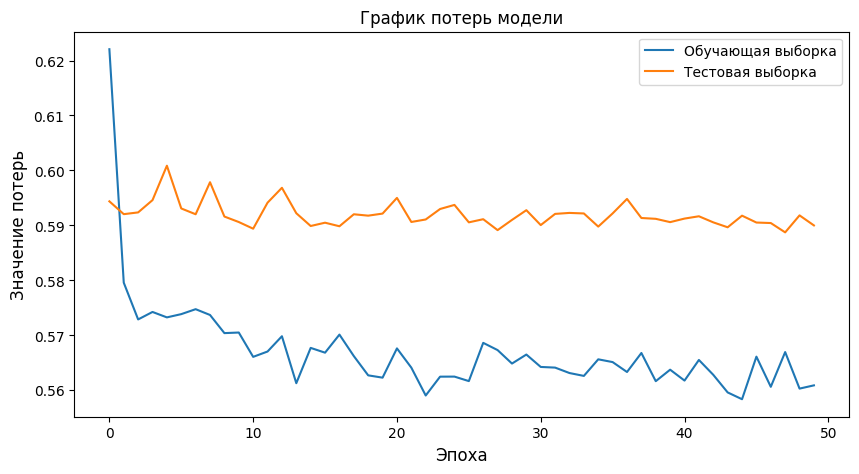

In [138]:

# Визуализация графика потерь модели
model_loss_plot(history)


22/22 [==============================] - 0s 7ms/step


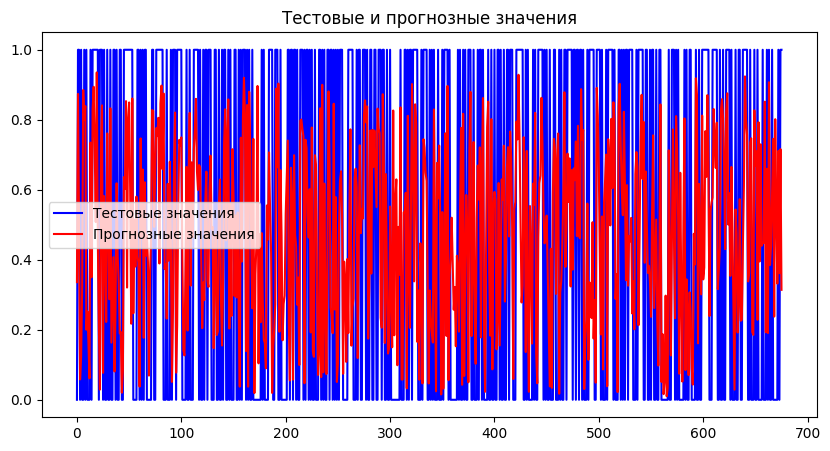

In [141]:
# Визуализация оригинальных и предсказанных значений

pred_y = model.predict(X_test_scal)
original_y = y_test.values
predicted_y = pred_y

actual_and_predicted_plot(original_y, predicted_y)


LSTM

In [139]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Обучение модели LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train_scal.shape[1], 1), activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(32, return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train_scal.reshape((X_train_scal.shape[0], X_train_scal.shape[1], 1)), y_train, epochs=50, batch_size=32, verbose=2)

# Оценка качества модели на тестовых данных
scores = model.evaluate(X_test_scal.reshape((X_test_scal.shape[0], X_test_scal.shape[1], 1)), y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
50/50 - 12s - loss: 0.6683 - accuracy: 0.5882 - 12s/epoch - 244ms/step
Epoch 2/50
50/50 - 1s - loss: 0.6577 - accuracy: 0.6148 - 872ms/epoch - 17ms/step
Epoch 3/50
50/50 - 1s - loss: 0.6567 - accuracy: 0.6047 - 860ms/epoch - 17ms/step
Epoch 4/50
50/50 - 1s - loss: 0.6560 - accuracy: 0.6136 - 868ms/epoch - 17ms/step
Epoch 5/50
50/50 - 1s - loss: 0.6552 - accuracy: 0.6168 - 915ms/epoch - 18ms/step
Epoch 6/50
50/50 - 1s - loss: 0.6514 - accuracy: 0.6212 - 866ms/epoch - 17ms/step
Epoch 7/50
50/50 - 1s - loss: 0.6506 - accuracy: 0.6187 - 898ms/epoch - 18ms/step
Epoch 8/50
50/50 - 1s - loss: 0.6473 - accuracy: 0.6256 - 894ms/epoch - 18ms/step
Epoch 9/50
50/50 - 1s - loss: 0.6362 - accuracy: 0.6275 - 872ms/epoch - 17ms/step
Epoch 10/50
50/50 - 1s - loss: 0.6220 - accuracy: 0.6466 - 894ms/epoch - 18ms/step
Epoch 11/50
50/50 - 1s - loss: 0.5973 - accuracy: 0.6707 - 878ms/epoch - 18ms/step
Epoch 12/50
50/50 - 1s - loss: 0.5881 - accuracy: 0.6904 - 891ms/epoch - 18ms/step
Epoch 13/50
5

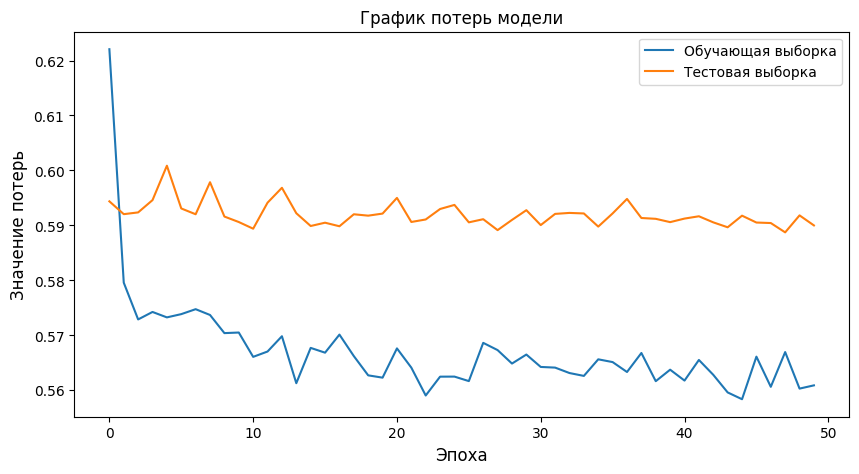

In [142]:

# Визуализация потерь модели
model_loss_plot(history)

22/22 [==============================] - 0s 7ms/step


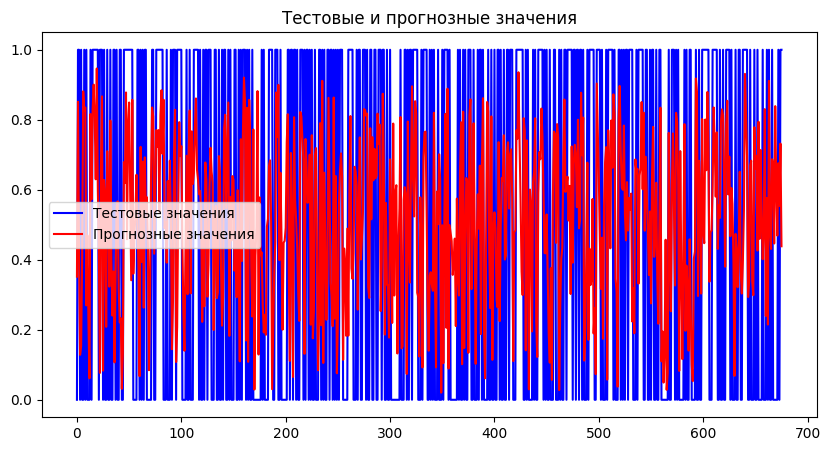

In [108]:
# Визуализация оригинальных и предсказанных значений

pred_y = model.predict(X_test_scal)
original_y = y_test.values
predicted_y = pred_y

actual_and_predicted_plot(original_y, predicted_y)

CNN

In [144]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam

# Преобразование данных в 3D-массивы для входа в CNN
X_train_cnn = X_train_scal.reshape(X_train_scal.shape[0], X_train_scal.shape[1], 1)
X_test_cnn = X_test_scal.reshape(X_test_scal.shape[0], X_test_scal.shape[1], 1)

# Создание модели CNN
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='tanh', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.002), metrics=['accuracy'])
model.summary()

# Обучение модели
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=50, batch_size=32)

# Оценка качества модели на тестовых данных
scores = model.evaluate(X_test_cnn, y_test, verbose=0)
print('Accuracy: %.2f%%' % (scores[1]*100))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 5, 32)             128       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 2, 32)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 64)                4160      
                                                                 
 dense_58 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
___________________________________________________

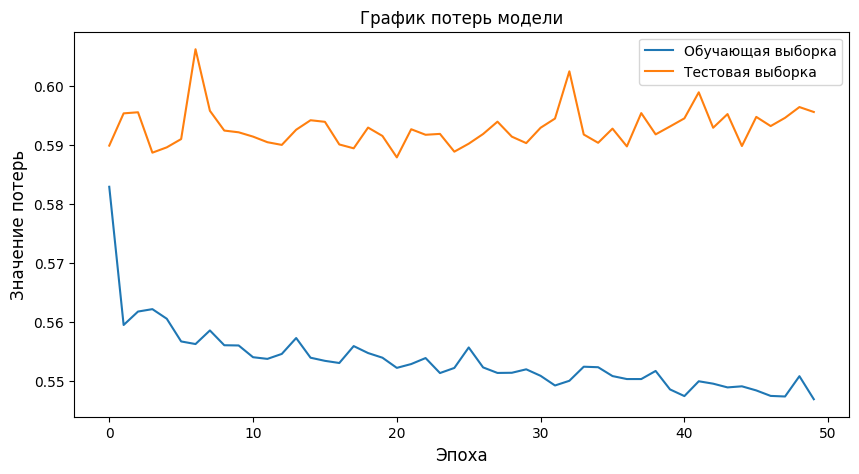

In [145]:
# Визуализация потерь модели
model_loss_plot(history)

22/22 [==============================] - 0s 4ms/step


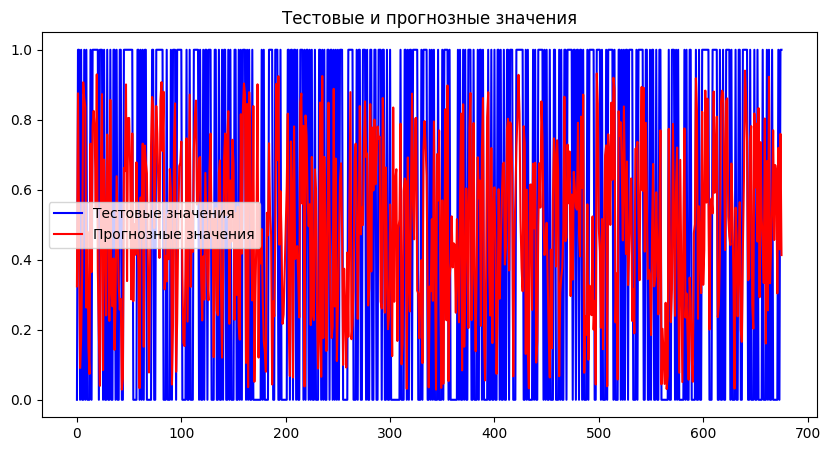

In [98]:
# Визуализация оригинальных и предсказанных значений

pred_y = model.predict(X_test_scal)
original_y = y_test.values
predicted_y = pred_y

actual_and_predicted_plot(original_y, predicted_y)

In [57]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.4
aiosignal==1.3.1
asttokens==2.2.1
astunparse==1.6.3
async-generator==1.10
async-timeout==4.0.2
attrs==22.2.0
backcall==0.2.0
beautifulsoup4==4.12.0
binance==0.3
blinker==1.6.2
Brotli==1.0.9
bs4==0.0.1
cachetools==5.3.0
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==3.1.0
click==8.1.3
colorama==0.4.6
comm==0.1.3
contourpy==1.0.7
cryptography==40.0.1
cycler==0.11.0
dateparser==1.1.8
debugpy==1.6.6
decorator==5.1.1
exceptiongroup==1.1.1
executing==1.2.0
fake-useragent==1.1.3
Flask==2.3.1
flatbuffers==23.3.3
fonttools==4.39.2
frozenlist==1.3.3
gast==0.4.0
google==3.0.0
google-auth==2.17.3
google-auth-oauthlib==1.0.0
google-pasta==0.2.0
grpcio==1.54.0
h11==0.14.0
h2==4.1.0
h5py==3.8.0
hpack==4.0.0
hyperframe==6.0.1
idna==3.4
importlib-metadata==6.1.0
importlib-resources==5.12.0
ipykernel==6.22.0
ipython==8.11.0
itsdangerous==2.1.2
jax==0.4.8
jedi==0.18.2
Jinja2==3.1.2
joblib==1.2.0
jupyter_client==8.1.0
jupyter_core==5.3.0
kaitaistruct==0.10
keras==2.12.0
